In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
#Write Data to CSV
filename_write = 'tabelka_wspolczynnikow.csv'

# make new DataFrame
df_ratio = pd.DataFrame()

### Odczytywanie danych z wcześniej przygotowanych plików 
Aby szybciej można było odczytywać dane przygotowano 4 pliki CSV, w których znajdują się jedynie niezbędne informacje do dalszej analizy wyszukiwania zepsutych rowerów
##### Do zmiennej df_ratio przypisywany jest stosunek Ccałkowitego czasu wypożyczenia roweru w danym dniu do długości całego dnia
###### Nie jest tutaj uwzględniana ilość wypożyczeń 

In [3]:
for num in [0,1,2,3]:
    df_main = pd.read_csv(f'all_lokalization_of_bike0{num}.csv', low_memory=False)
    print(num)

    if num == 0:
        df_ratio['bike_numbers'] = df_main['bike_numbers']

    col_list = df_main.columns.tolist()
    date_days = sorted(list(set([name[:name.index(',')] for name in col_list[1:]])),
                       key=lambda x: time.mktime(time.strptime(x,"%d/%m/%Y"))) # lista dni posortowanych
    column_numbers = []

    for days in date_days:
        day_data = df_main.loc[:,df_main.columns.str.startswith(days)] #filtruje kolumny jedynie z danego dnia
        col_numb = len(day_data.columns)    # ilość odczytów z danego dnia
        column_numbers.append(col_numb)
        if df_ratio.columns[-1] == days:
            df_ratio[days] = (df_ratio[days] + day_data.isnull().sum(axis=1) / col_numb)/2
        else:
            # stosunek ile czasu jest rower wypożyczony / czas całkowitego danego dnia
            df_ratio[days] = day_data.isnull().sum(axis=1)/col_numb
    del df_main
    print("Koniec pętli: "+ str(num)+" z 3")
print('Koniec obliczeń')

0
Koniec pętli: 0 z 3
1
Koniec pętli: 1 z 3
2
Koniec pętli: 2 z 3
3
Koniec pętli: 3 z 3
Koniec obliczeń


### Tabela gdzie dla każdego dnia znajduje się stosunek 
#### Ilość odczytów gdy rower był wypożyczony/ suma wszystkich odczytów z dnia

In [4]:
df_ratio

,bike_numbers,04/03/2018,05/03/2018,06/03/2018,07/03/2018,08/03/2018,09/03/2018,10/03/2018,11/03/2018,12/03/2018,...,24/03/2018,25/03/2018,26/03/2018,27/03/2018,28/03/2018,29/03/2018,30/03/2018,31/03/2018,01/04/2018,02/04/2018
0,24731,0.0,0.014286,0.014085,0.0,0.000000,0.000000,0.000000,0.111111,0.000000,...,0.032,0.144928,0.041667,0.027778,0.027778,0.000000,0.120567,0.000000,0.000000,0.0
1,24673,0.0,0.000000,0.000000,0.0,0.027778,0.000000,0.000000,0.145833,0.069444,...,0.000,0.188406,0.055556,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,24612,0.0,0.000000,0.000000,0.0,0.013889,0.000000,0.031915,0.145833,0.000000,...,0.040,0.072464,0.236111,0.173611,0.000000,0.000000,0.000000,0.107143,0.020833,0.0
3,26774,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.013889,0.000000,0.000000,0.042553,0.000000,0.000000,0.0
4,26632,0.0,0.000000,0.014085,0.0,0.000000,0.000000,0.000000,0.048611,0.006944,...,0.000,0.188406,0.013889,0.097222,0.111111,0.027778,0.262411,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,63613,1.0,1.000000,1.000000,1.0,1.000000,0.395833,0.000000,0.020833,0.312500,...,0.000,0.152174,0.069444,0.013889,0.055556,0.000000,0.000000,0.014286,0.000000,0.0
5152,89519,1.0,1.000000,1.000000,1.0,1.000000,0.798611,0.758865,1.000000,1.000000,...,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
5153,28512,1.0,1.000000,1.000000,1.0,1.000000,0.875000,0.063830,0.090278,0.041667,...,0.000,0.123188,0.180556,0.048611,0.027778,0.013889,0.000000,0.057143,0.000000,0.0
5154,63628,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.187943,0.034722,0.000000,...,0.024,0.123188,0.000000,0.027778,0.027778,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
import seaborn as sns

<Figure size 864x720 with 0 Axes>

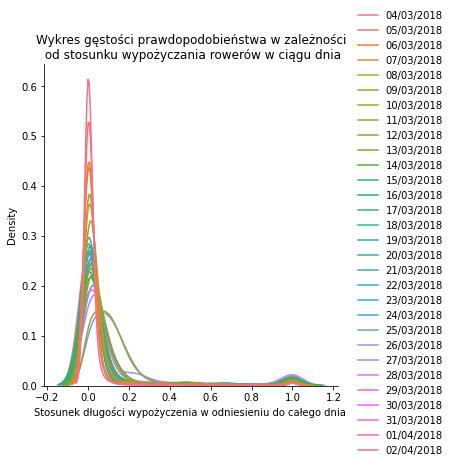

In [6]:
plt.figure(figsize=(12,10))
sns.displot(df_ratio.iloc[:,1:], kind="kde")
plt.xlabel("Stosunek długości wypożyczenia w odniesieniu do całego dnia ")
plt.title("Wykres gęstości prawdopodobieństwa w zależności\n od stosunku wypożyczania rowerów w ciągu dnia")
plt.show()

##### Transponowanie macierzy 

In [7]:
df_ratio.set_index("bike_numbers")
df_transpose = df_ratio.T
df_transpose.rename(columns=df_transpose.iloc[0].astype('int32'), inplace = True)
df_transpose.drop(df_transpose.index[0], inplace = True)
df_transpose

,24731,24673,24612,26774,26632,26402,26330,26217,25956,25927,...,96554,63626,28565,24155,80223,63613,89519,28512,63628,63615
04/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.013986,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
05/03/2018,0.014286,0.000000,0.000000,0.000000,0.000000,0.007143,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
06/03/2018,0.014085,0.000000,0.000000,0.000000,0.014085,0.161972,0.000000,0.000000,0.021127,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
07/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.118881,0.034965,0.000000,0.020979,0.000000,...,0.846154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
08/03/2018,0.000000,0.027778,0.013889,0.000000,0.000000,0.000000,0.152778,0.000000,0.013889,0.000000,...,0.013889,0.347222,0.520833,0.541667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
09/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.013889,0.090278,0.013889,0.000000,0.243056,0.395833,0.798611,0.875000,1.000000,1.000000
10/03/2018,0.000000,0.000000,0.031915,0.000000,0.000000,0.014184,0.000000,0.000000,0.000000,0.007092,...,0.067376,0.000000,0.028369,0.028369,0.000000,0.000000,0.758865,0.063830,0.187943,0.308511
11/03/2018,0.111111,0.145833,0.145833,0.000000,0.048611,0.013889,0.000000,0.138889,0.000000,0.125000,...,0.159722,0.000000,0.000000,0.215278,0.000000,0.020833,1.000000,0.090278,0.034722,0.041667
12/03/2018,0.000000,0.069444,0.000000,0.000000,0.006944,0.243056,0.027778,0.083333,0.000000,0.125000,...,0.326389,0.000000,0.000000,0.131944,0.555556,0.312500,1.000000,0.041667,0.000000,0.000000
13/03/2018,0.173611,0.125000,0.034722,0.013889,0.000000,0.055556,0.027778,0.013889,0.027778,0.041667,...,0.847222,0.000000,0.013889,0.000000,1.000000,0.027778,1.000000,0.055556,0.027778,0.104167


In [8]:
# tworzenie tabeli która uwzględnia współczynniki wiekse niż 1
# dni, w których rower był nieobecny na żadnej stacji mają wartości NaN
df_t = df_transpose.copy()
for row in range(len(df_t.index)-1):
    row_to_add = np.where(np.array(df_t.iloc[row]) == np.array(df_t.iloc[row]).astype(int), df_t.iloc[row], 0)
    df_t.iloc[row] = df_t.iloc[row].apply(lambda x: np.nan if x.is_integer() and x >=1 else x) # w miejscach gdzie były 1 zamiana na NaN-y
    df_t.iloc[row+1] = df_t.iloc[row+1].add(row_to_add)
df_t

,24731,24673,24612,26774,26632,26402,26330,26217,25956,25927,...,96554,63626,28565,24155,80223,63613,89519,28512,63628,63615
04/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.013986,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/03/2018,0.014286,0.000000,0.000000,0.000000,0.000000,0.007143,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/03/2018,0.014085,0.000000,0.000000,0.000000,0.014085,0.161972,0.000000,0.000000,0.021127,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.118881,0.034965,0.000000,0.020979,0.000000,...,3.846154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/03/2018,0.000000,0.027778,0.013889,0.000000,0.000000,0.000000,0.152778,0.000000,0.013889,0.000000,...,0.013889,4.347222,4.520833,4.541667,NaN,NaN,NaN,NaN,NaN,NaN
09/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.013889,0.090278,0.013889,0.000000,5.243056,5.395833,5.798611,5.875000,NaN,NaN
10/03/2018,0.000000,0.000000,0.031915,0.000000,0.000000,0.014184,0.000000,0.000000,0.000000,0.007092,...,0.067376,0.000000,0.028369,0.028369,0.000000,0.000000,0.758865,0.063830,6.187943,6.308511
11/03/2018,0.111111,0.145833,0.145833,0.000000,0.048611,0.013889,0.000000,0.138889,0.000000,0.125000,...,0.159722,0.000000,0.000000,0.215278,0.000000,0.020833,NaN,0.090278,0.034722,0.041667
12/03/2018,0.000000,0.069444,0.000000,0.000000,0.006944,0.243056,0.027778,0.083333,0.000000,0.125000,...,0.326389,0.000000,0.000000,0.131944,0.555556,0.312500,NaN,0.041667,0.000000,0.000000
13/03/2018,0.173611,0.125000,0.034722,0.013889,0.000000,0.055556,0.027778,0.013889,0.027778,0.041667,...,0.847222,0.000000,0.013889,0.000000,NaN,0.027778,NaN,0.055556,0.027778,0.104167


In [9]:
# przedziały histogramu
compartments = np.append(np.linspace(0,1,24),np.arange(2,24))
compartments

array([ 0.        ,  0.04347826,  0.08695652,  0.13043478,  0.17391304,
        0.2173913 ,  0.26086957,  0.30434783,  0.34782609,  0.39130435,
        0.43478261,  0.47826087,  0.52173913,  0.56521739,  0.60869565,
        0.65217391,  0.69565217,  0.73913043,  0.7826087 ,  0.82608696,
        0.86956522,  0.91304348,  0.95652174,  1.        ,  2.        ,
        3.        ,  4.        ,  5.        ,  6.        ,  7.        ,
        8.        ,  9.        , 10.        , 11.        , 12.        ,
       13.        , 14.        , 15.        , 16.        , 17.        ,
       18.        , 19.        , 20.        , 21.        , 22.        ,
       23.        ])

In [10]:
# przedziały histogramu
compartments2 = np.linspace(0,len(df_transpose.index),len(df_transpose.index)*24)
compartments2

array([ 0.        ,  0.04172462,  0.08344924,  0.12517385,  0.16689847,
        0.20862309,  0.25034771,  0.29207232,  0.33379694,  0.37552156,
        0.41724618,  0.45897079,  0.50069541,  0.54242003,  0.58414465,
        0.62586926,  0.66759388,  0.7093185 ,  0.75104312,  0.79276773,
        0.83449235,  0.87621697,  0.91794159,  0.9596662 ,  1.00139082,
        1.04311544,  1.08484006,  1.12656467,  1.16828929,  1.21001391,
        1.25173853,  1.29346314,  1.33518776,  1.37691238,  1.418637  ,
        1.46036161,  1.50208623,  1.54381085,  1.58553547,  1.62726008,
        1.6689847 ,  1.71070932,  1.75243394,  1.79415855,  1.83588317,
        1.87760779,  1.91933241,  1.96105702,  2.00278164,  2.04450626,
        2.08623088,  2.12795549,  2.16968011,  2.21140473,  2.25312935,
        2.29485396,  2.33657858,  2.3783032 ,  2.42002782,  2.46175243,
        2.50347705,  2.54520167,  2.58692629,  2.6286509 ,  2.67037552,
        2.71210014,  2.75382476,  2.79554937,  2.83727399,  2.87

In [11]:
list_of_bikes = list(df_transpose.sample(n=20,axis='columns')) #wybór 20 losowych rowerów do późniejszej analizy

## Histogram ilości wypożyczeń roweru w ciągu całego miesiąca
Wykres sporządzony dla 20 losowo wybranych rowerów

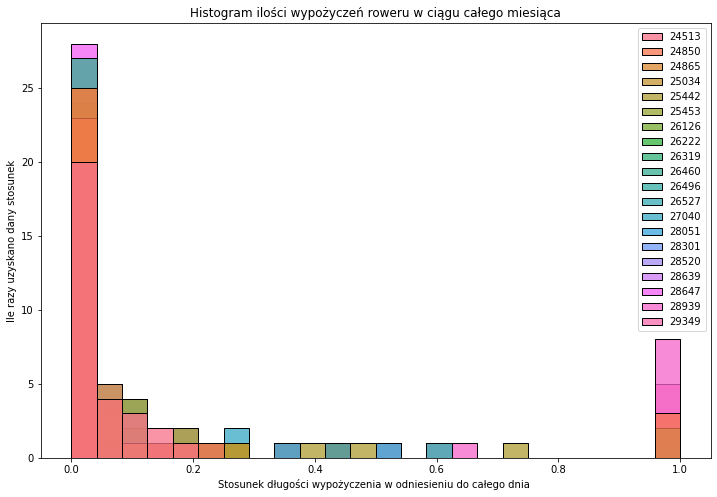

In [12]:
plt.figure(figsize=(12,8))
hist = sns.histplot(data=df_transpose[list_of_bikes],bins=24,legend=True)
plt.xlabel("Stosunek długości wypożyczenia w odniesieniu do całego dnia ")
plt.ylabel("Ile razy uzyskano dany stosunek")
plt.title("Histogram ilości wypożyczeń roweru w ciągu całego miesiąca")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Badanie czy rozkład jest wykładniczy

In [13]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df_transpose_flat = df_transpose.to_numpy().flatten()

In [15]:
df_transpose_fit = ss.expon.fit(df_transpose_flat)

In [16]:
smean = np.array([df_transpose_flat]).mean()
rate = 1/smean

In [17]:
smax = np.array([df_transpose_flat]).max()
x = np.linspace(0,smax,100)

In [18]:
dist_exp = ss.expon.pdf(x, scale=1/rate)

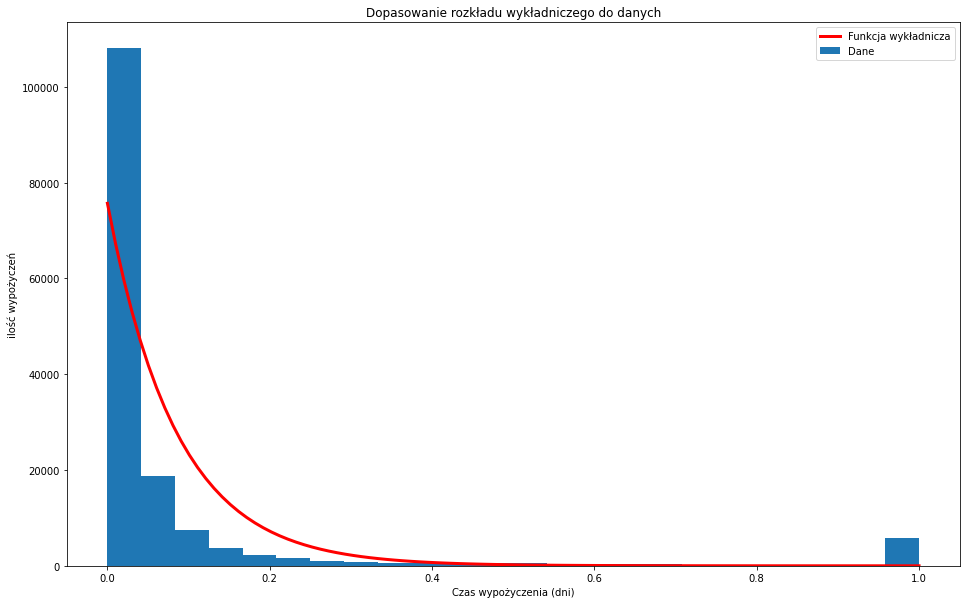

In [19]:
nbins = 24
fig, ax = plt.subplots(figsize=(16, 10))
# 1
ax.hist(df_transpose_flat, nbins, label="Dane", histtype='bar')
ax.plot(x, dist_exp * len(df_transpose_flat) * smax / nbins,
        '-r', lw=3, label="Funkcja wykładnicza")
ax.set_xlabel("Czas wypożyczenia (dni)")
ax.set_ylabel("ilość wypożyczeń")
ax.set_title("Dopasowanie rozkładu wykładniczego do danych")
ax.legend()

## Przeprowadzenie testu Kolmogorowa-Smirnova

In [20]:
KS_test = ss.kstest(df_transpose_flat,'expon',args=df_transpose_fit)
KS_test

KstestResult(statistic=0.4599172485130592, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,46, a odpowiadająca jej wartość p wynosi  0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Wykładniczego.


#### Porównanie dopasowania fukcji wykładniczej z danymi
Testowanie jak dobrze funckja aproksymacji dla rozkładu normalnego przybliżyła rozkład naszych danych

In [21]:
from scipy.stats import ks_2samp

In [22]:
KS_test_2_sample = ks_2samp(df_transpose_flat,dist_exp)
KS_test_2_sample

KstestResult(statistic=0.4599172485130592, pvalue=7.150546605592676e-20)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,46, a odpowiadająca jej wartość p wynosi  7,15e-20.
Ponieważ wartość p jest mniejsza niż 0,05, odrzucamy hipotezę zerową. Oznacza to, że funkcja aptoksymacji oparta o rozkład wykładniczy, bardzo słabo dopasowała do danych. 

# 
# 

# Uwzględnienie współczynnika większego niż 1


### Histogram uwzględniający wypożyczenie rowerów na więcej niż 1 dzień 


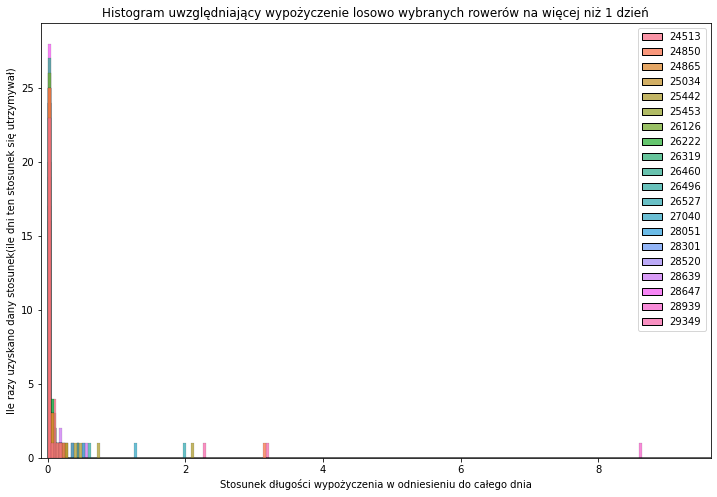

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_t[list_of_bikes],bins=compartments2, legend=True)
plt.xlabel("Stosunek długości wypożyczenia w odniesieniu do całego dnia")
plt.ylabel("Ile razy uzyskano dany stosunek(ile dni ten stosunek się utrzymywał)")
plt.title("Histogram uwzględniający wypożyczenie losowo wybranych rowerów na więcej niż 1 dzień")
plt.xlim([-0.1,df_t[list_of_bikes].max().max()+1])
plt.show()

Generowanie Poniższego wykresu trwa dłuższą chwilę 

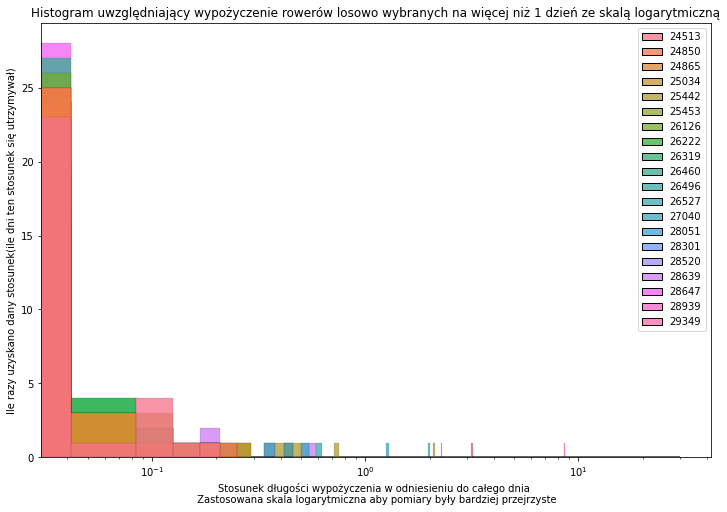

In [24]:
#Zastsowano skale logaryticzną dla lepszego zobrazowania wyników
plt.figure(figsize=(12,8))
sns.histplot(data=df_t[list_of_bikes],bins=compartments2, legend=True)
plt.xlabel("Stosunek długości wypożyczenia w odniesieniu do całego dnia \n Zastosowana skala logarytmiczna aby pomiary były bardziej przejrzyste")
plt.ylabel("Ile razy uzyskano dany stosunek(ile dni ten stosunek się utrzymywał)")
plt.title("Histogram uwzględniający wypożyczenie rowerów losowo wybranych na więcej niż 1 dzień ze skalą logarytmiczną")
plt.xscale('log')
plt.show()

In [25]:
# stworzenie listy list rowerów bez Nanów
data_not_nan = df_t.apply(lambda x: x.dropna().tolist()).tolist()

In [26]:
flat_data = [item for sublist in data_not_nan for item in sublist]

In [27]:
h_data,e = np.histogram(flat_data)

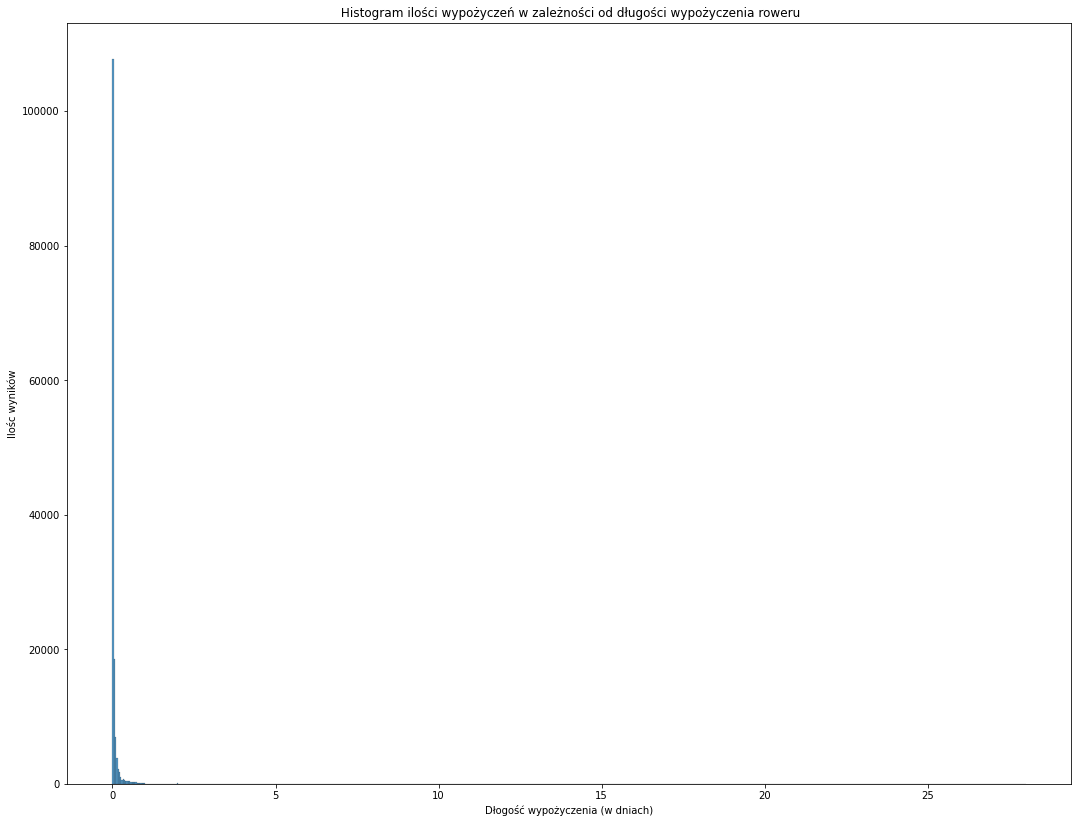

In [28]:
fig,ax = plt.subplots(figsize=(18,14))
sns.histplot(data=flat_data,bins=24*len(df_transpose.index), legend=False)
plt.title(" Histogram ilości wypożyczeń w zależności od długości wypożyczenia roweru")
plt.xlabel("Dłogość wypożyczenia (w dniach)")
plt.ylabel("Ilośc wyników")
plt.show()

##### Powyższy wykres został przybliżony do najważniejszej części

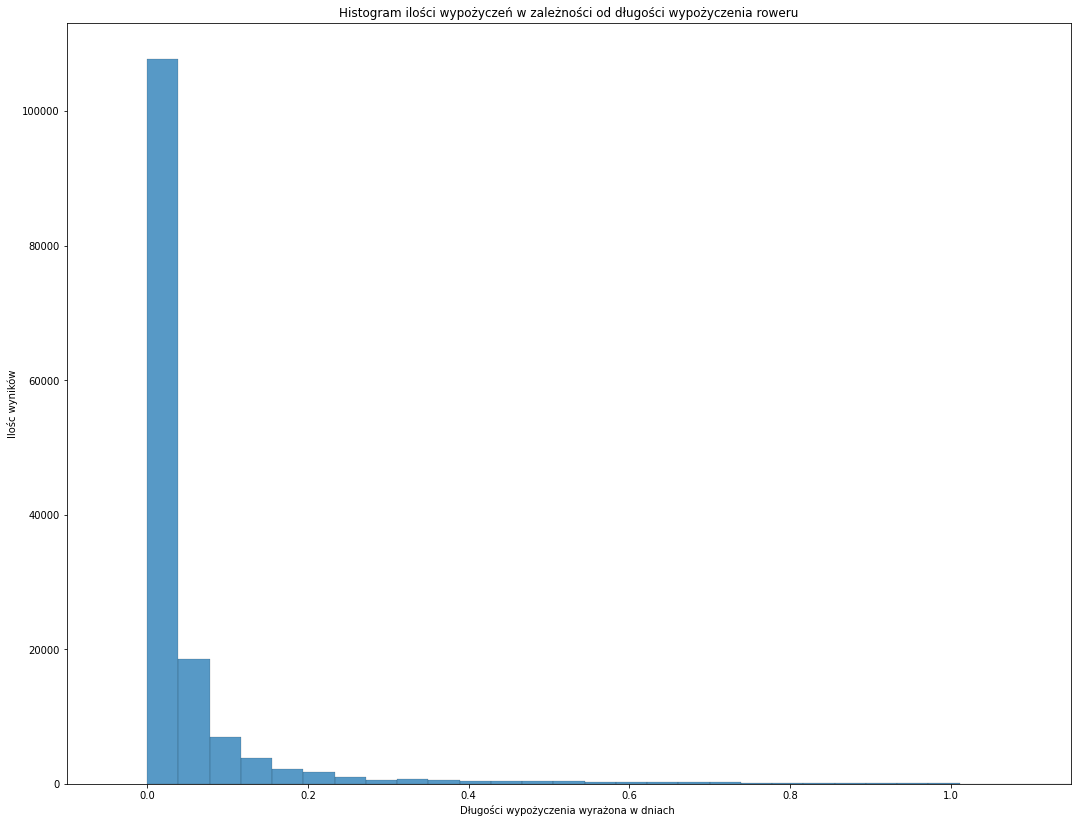

In [29]:
fig,ax = plt.subplots(figsize=(18,14))
sns.histplot(data=flat_data,bins=24*len(df_transpose.index), legend=False)
plt.title("Histogram ilości wypożyczeń w zależności od długości wypożyczenia roweru")
plt.xlabel("Długości wypożyczenia wyrażona w dniach ")
plt.ylabel("Ilośc wyników")
plt.xlim([-0.1,1.15])
plt.show()

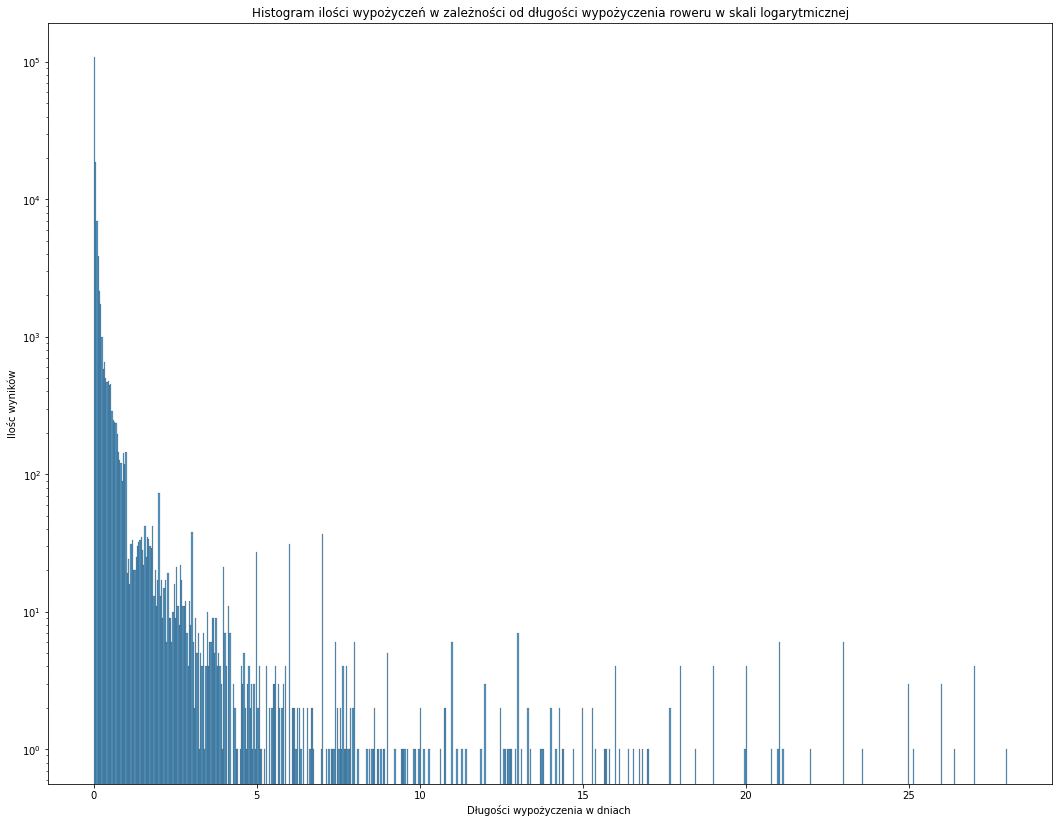

In [30]:
# Zastosowanie skali logarytmicznej
fig,ax = plt.subplots(figsize=(18,14))
sns.histplot(data=flat_data,bins=24*len(df_transpose.index), legend=False)
plt.title("Histogram ilości wypożyczeń w zależności od długości wypożyczenia roweru w skali logarytmicznej")
plt.xlabel("Długości wypożyczenia w dniach ")
plt.ylabel("Ilośc wyników")
plt.yscale('log')
plt.show()

# Analiza rozkładów

### Badanie czy funckja ma rozkład wykładniczy 
#### (uwzględniając że rower może być wypożyczony dłuzej niż 1 dzień)
(funkcja Exponencjalna)

In [31]:
import scipy.stats as ss
%matplotlib inline

In [32]:
smean = np.array([flat_data]).mean()
rate = 1/smean

In [33]:
smax = np.array([flat_data]).max()
days = np.linspace(0,smax,24*len(df_transpose.index))

In [34]:
dist_exp = ss.expon.pdf(days, scale=1/rate)

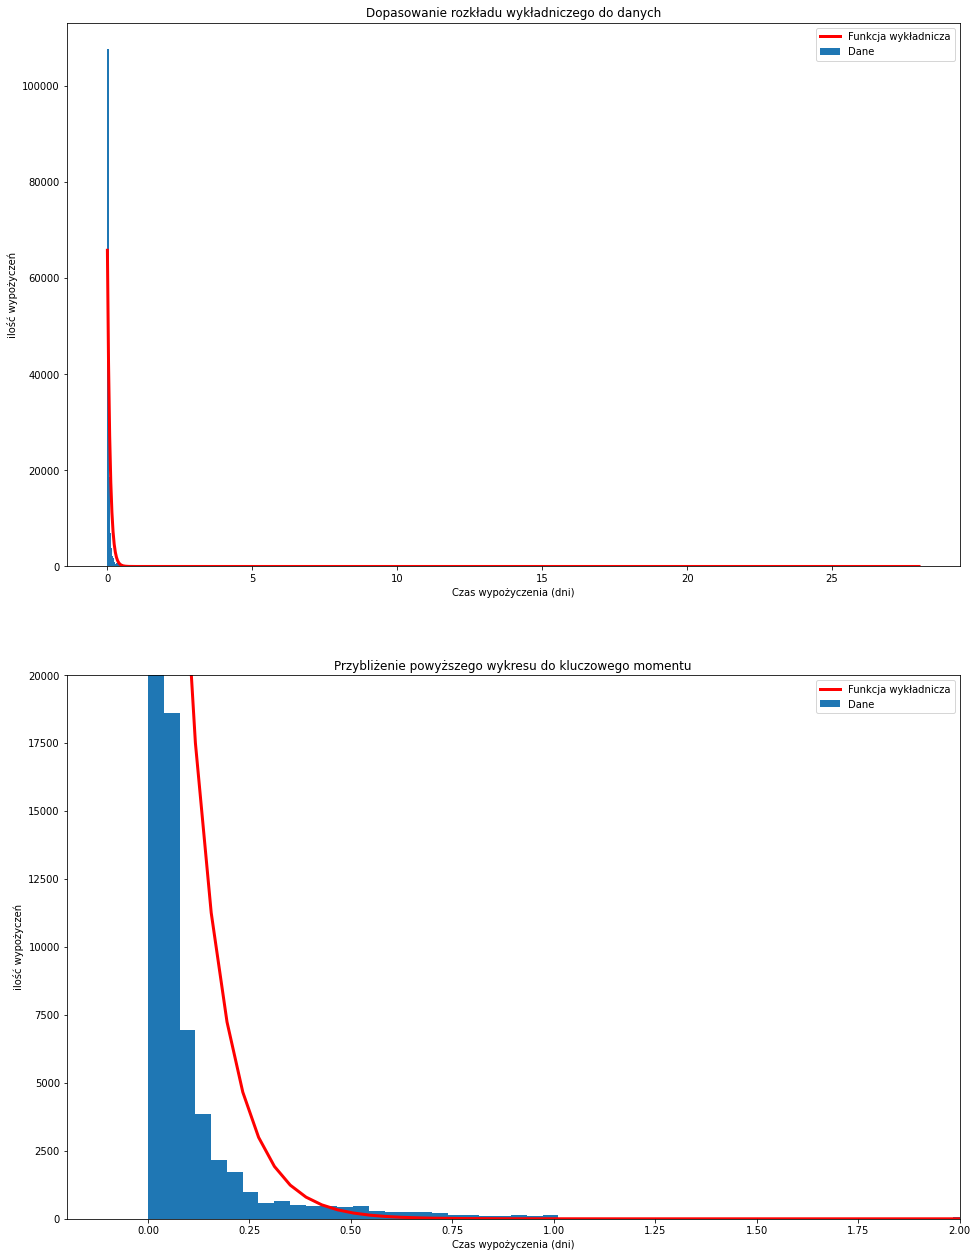

In [35]:
nbins = 24*len(df_transpose.index)
fig, ax = plt.subplots(2, 1, figsize=(16, 22))
# 1
ax[0].hist(flat_data, nbins, label="Dane")
ax[0].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label="Funkcja wykładnicza")
ax[0].set_xlabel("Czas wypożyczenia (dni)")
ax[0].set_ylabel("ilość wypożyczeń")
ax[0].set_title("Dopasowanie rozkładu wykładniczego do danych")
ax[0].legend()
# 2
ax[1].hist(flat_data, nbins, label="Dane")
ax[1].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label="Funkcja wykładnicza")
ax[1].set_xlabel("Czas wypożyczenia (dni)")
ax[1].set_ylabel("ilość wypożyczeń")
ax[1].set_title("Przybliżenie powyższego wykresu do kluczowego momentu")
ax[1].set_xlim([-0.2,2])
ax[1].set_ylim([0,20000])
plt.legend()

## Przeprowadzenie testu Kolmogorowa-Smirnova

In [36]:
P = ss.expon.fit(flat_data)
P

(0.0, 0.08824184010881664)

In [37]:
loc, scale = P

In [38]:
KS_test_expon = ss.kstest(flat_data, ss.expon.cdf, P)
KS_test_expon

KstestResult(statistic=0.4764140517732159, pvalue=0.0)

Na podstawie powyższych wyników można odrzucić tezę, iż dane pochodzą z rozkładu wykładniczego
Wartość p-value wyszła bliska 0 dlatego też z bardzo dużym prawdopodobieństwem można zaprzeczyć tezie 0.
#### Test kolmogorowa-Smirnowa dla 2 próbek zwraca wartości

In [39]:
KS_test_2_sample = ks_2samp(flat_data,dist_exp)
KS_test_2_sample

KstestResult(statistic=0.499104136201437, pvalue=1.2160384094053997e-165)

p-value jest znacznie mniejsze niż 0.01 dlatego też z dużym prawdopodobieństwem można zaprzeczyć rozkładowi wykładniczemu danych

# 
### Sprawdzanie z testu chi kwadrat 


In [40]:
ideal_compart = []
data_compart =[]
# wartość 5 rowerów jest uzyskiwana dla i=312
# ustawiona wartosc i=40 jest maksymalną wartoscia dla ktrorej mozna przeprowadzac test chi kwadrat,
# ponizej tej wartosci rozklad prawdopodobienstwa uzyskania wartosci wynosi 0 
# (powyzej tej wartosci w tescie chi-kwadrat pojawia sie dzielenie przez 0)
for i in range(40):
    dist = ss.expon(loc,scale)
    count_ideal = dist.cdf(i+1/12)-dist.cdf(i/12)
    ideal_compart.append(count_ideal*len(flat_data))
    
    count_data = len(list(filter(lambda x:x<=i+1/12 and x>=i/12, flat_data)))
    data_compart.append(count_data)

In [41]:
ideal_compart

[91236.87964168079,
 58067.42485570592,
 22584.016615012835,
 8783.439238193998,
 3416.079882411432,
 1328.5913918857304,
 516.7194993539912,
 200.96400040171144,
 78.15948402944585,
 30.398006267471448,
 11.822478058953266,
 4.598031404583538,
 1.7882793008393827,
 0.6955026132840275,
 0.27049683169545313,
 0.1052023882692954,
 0.040915608608022014,
 0.015913013534264997,
 0.006188933962120724,
 0.002407017593921701,
 0.0009361440519228825,
 0.0003640877783206431,
 0.00014160204266866483,
 5.507226905232532e-05,
 2.141886755013811e-05,
 8.330278825074977e-06,
 3.2398319088633443e-06,
 1.2600386928296459e-06,
 4.900583294720207e-07,
 1.9059297362566952e-07,
 7.41286987349099e-08,
 2.88259854874795e-08,
 1.1205500971556148e-08,
 4.359536620590632e-09,
 1.6907708566549218e-09,
 6.63047394766636e-10,
 2.486427730374885e-10,
 9.94571092149954e-11,
 3.31523697383318e-11,
 1.65761848691659e-11]

In [42]:
data_compart

[127977,
 20956,
 10764,
 7358,
 6000,
 4967,
 4053,
 3260,
 2795,
 2354,
 2074,
 1851,
 1606,
 1514,
 1473,
 1426,
 1389,
 1326,
 1265,
 1204,
 1136,
 1079,
 1009,
 981,
 952,
 862,
 840,
 819,
 791,
 776,
 749,
 713,
 690,
 656,
 629,
 617,
 597,
 552,
 539,
 529]

In [43]:
ss.chisquare(data_compart, f_exp=ideal_compart)

Power_divergenceResult(statistic=3.1122308574870348e+16, pvalue=0.0)

Wartość statystyczna p-value dla testu statystycznego Chi-Kwadrat wynosi 0 dlatego też należy odrzucić hipoteze, że wartości pochodzą z rozkładu wykładniczego

### 
## Badanie czy dane przypominają rozkład Fatiguelife

(0.0, 20000.0)

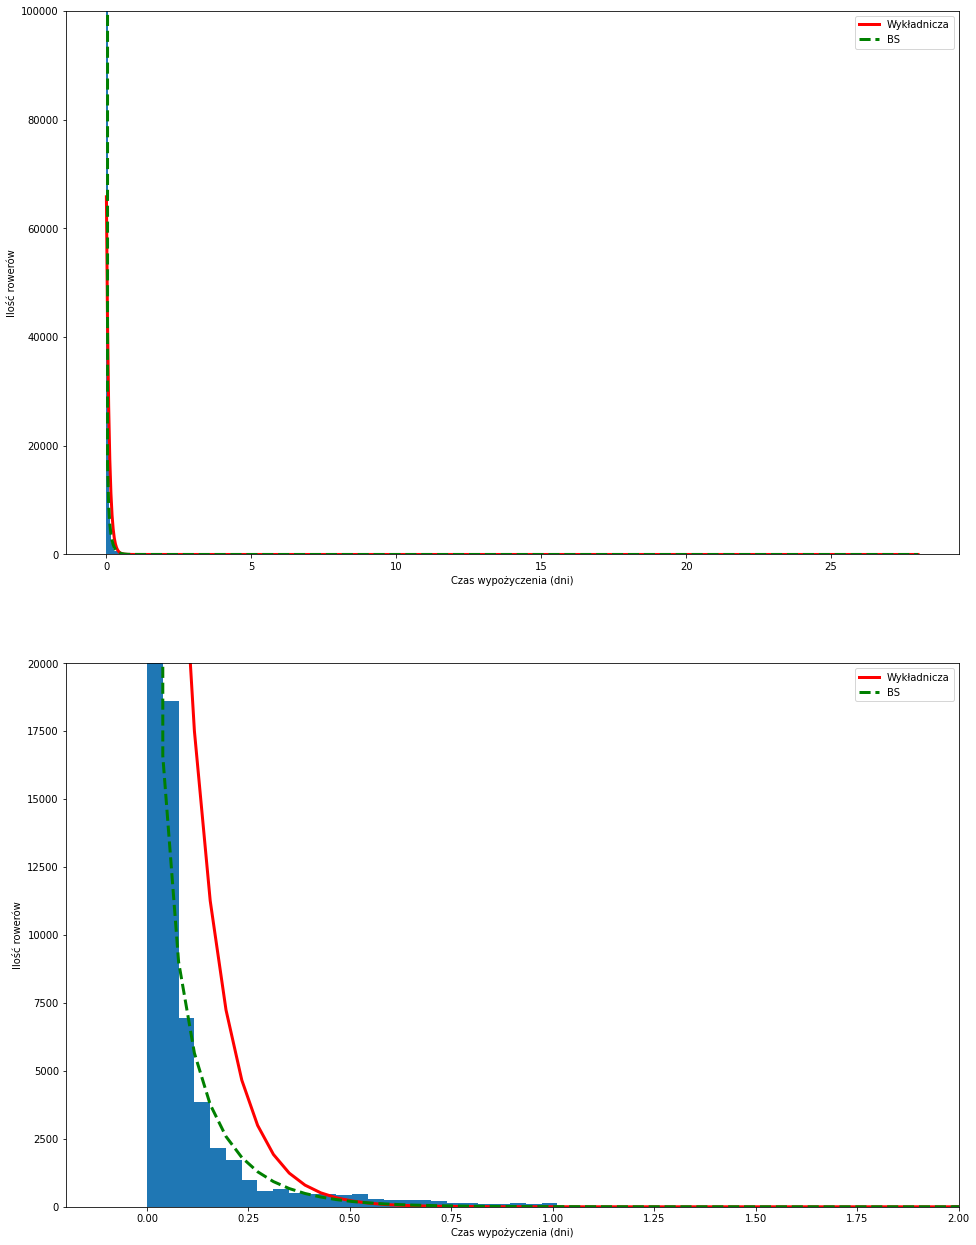

In [44]:
dist = ss.fatiguelife
args = dist.fit(flat_data)

dist_bs = dist.pdf(days, *args)

fig, ax = plt.subplots(2, 1, figsize=(16, 22))
# 1
ax[0].hist(flat_data, nbins)
ax[0].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[0].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[0].set_xlabel("Czas wypożyczenia (dni)")
ax[0].set_ylabel("Ilość rowerów")
ax[0].set_ylim([0,100000])
ax[0].legend()

#2
ax[1].hist(flat_data, nbins)
ax[1].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[1].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[1].set_xlabel("Czas wypożyczenia (dni)")
ax[1].set_ylabel("Ilość rowerów")
ax[1].legend()
ax[1].set_xlim([-0.2,2])
ax[1].set_ylim([0,20000])

## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu FatigueLife

In [45]:
bs_fit = ss.fatiguelife.fit(flat_data)
bs_fit

(304.522372525028, -3.033256917466999e-12, 7.969542129016484e-07)

In [46]:
KS_test_BS = ss.kstest(flat_data, ss.fatiguelife.cdf, bs_fit )
KS_test_BS

KstestResult(statistic=0.43024792649765664, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,43, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Fatiguelife.
#### Dla testu Kolmogorowa-Smirnowa 2 próbkowego wychodzą wyniki


In [47]:
KS_test_2_sample = ks_2samp(flat_data,dist_exp)
KS_test_2_sample

KstestResult(statistic=0.499104136201437, pvalue=1.2160384094053997e-165)

Mała wartość p-value również zapewnia odrzucenie hipotezę iż dane pochodzą z rozkładu FatigueLife

# Badanie czy dane przypominają rozkład Gilbrata

(0.0, 20000.0)

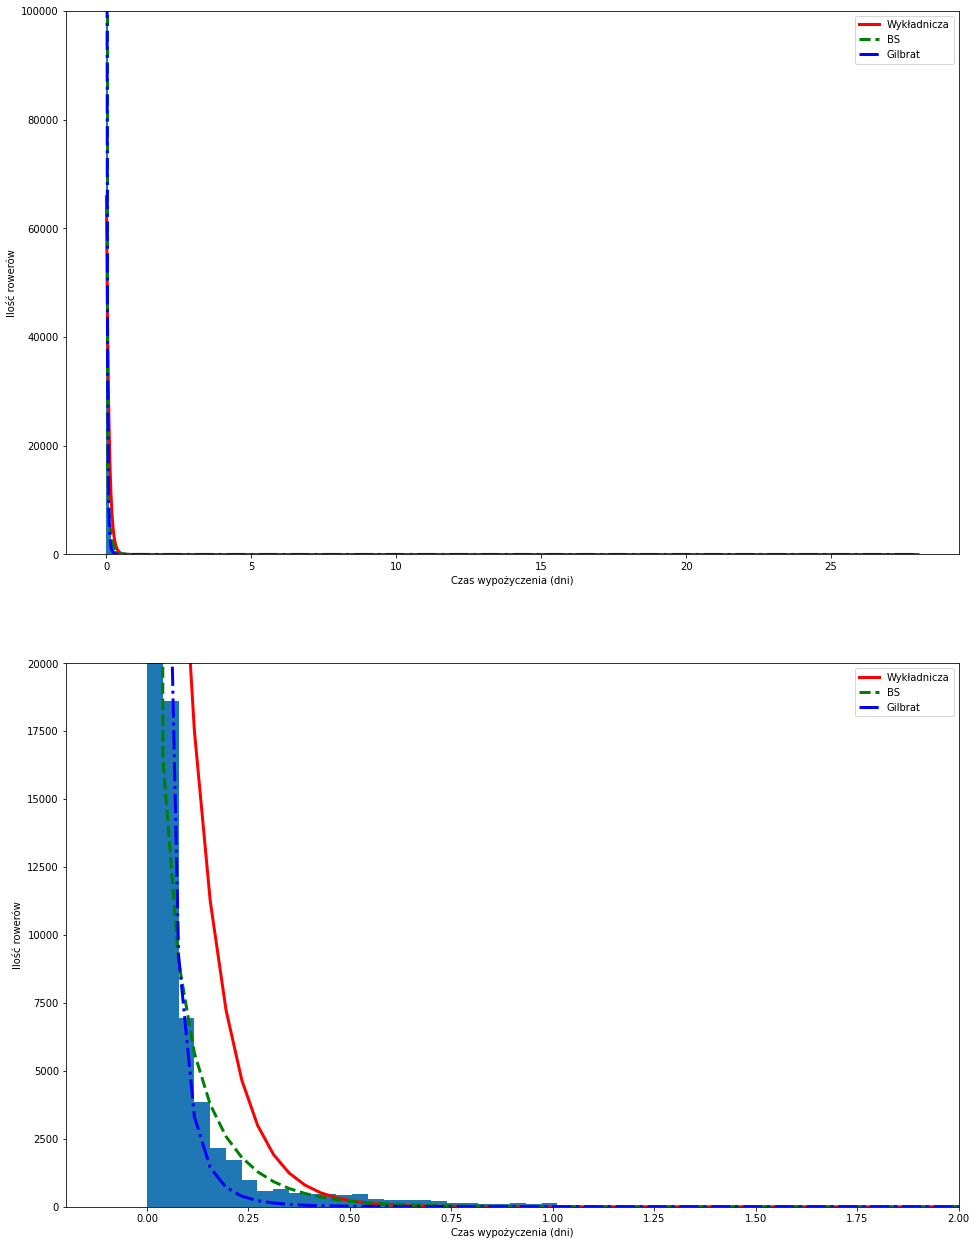

In [48]:
dist = ss.gilbrat
args = dist.fit(flat_data)

dist_gb = dist.pdf(days, *args)

fig, ax = plt.subplots(2, 1, figsize=(16, 22))
# 1
ax[0].hist(flat_data, nbins)
ax[0].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[0].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[0].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[0].set_xlabel("Czas wypożyczenia (dni)")
ax[0].set_ylabel("Ilość rowerów")
ax[0].set_ylim([0,100000])
ax[0].legend()

#2
ax[1].hist(flat_data, nbins)
ax[1].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[1].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[1].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[1].set_xlabel("Czas wypożyczenia (dni)")
ax[1].set_ylabel("Ilość rowerów")
ax[1].legend()
ax[1].set_xlim([-0.2,2])
ax[1].set_ylim([0,20000])

## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu Gilbrata

In [49]:
gb_fit = ss.gilbrat.fit(flat_data)
gb_fit

(-0.0055583228930850565, 0.018941452727468343)

In [50]:
KS_test_GB = ss.kstest(flat_data, ss.gilbrat.cdf, gb_fit)
KS_test_GB

KstestResult(statistic=0.3663253187321513, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,37, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Gilbrata.
#### Przeprowadzając test Kolmogorowa-Smirnowa dla 2 próbek otrzymujemy:

In [51]:
KS_test_2_sample = ks_2samp(flat_data,dist_bs)
KS_test_2_sample

KstestResult(statistic=0.49632635842365924, pvalue=1.1118405037412486e-163)

Wartość p-value jest znacznie mniejsza niż 0.01 dlatego też z dużą dozą prawdopodobieństwa stwierdzamy iż dane nie należą do rozkładu Gilbrata

# Badanie czy dane przypominają rozkład Half Cauchy-ego

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(0.0, 20000.0)

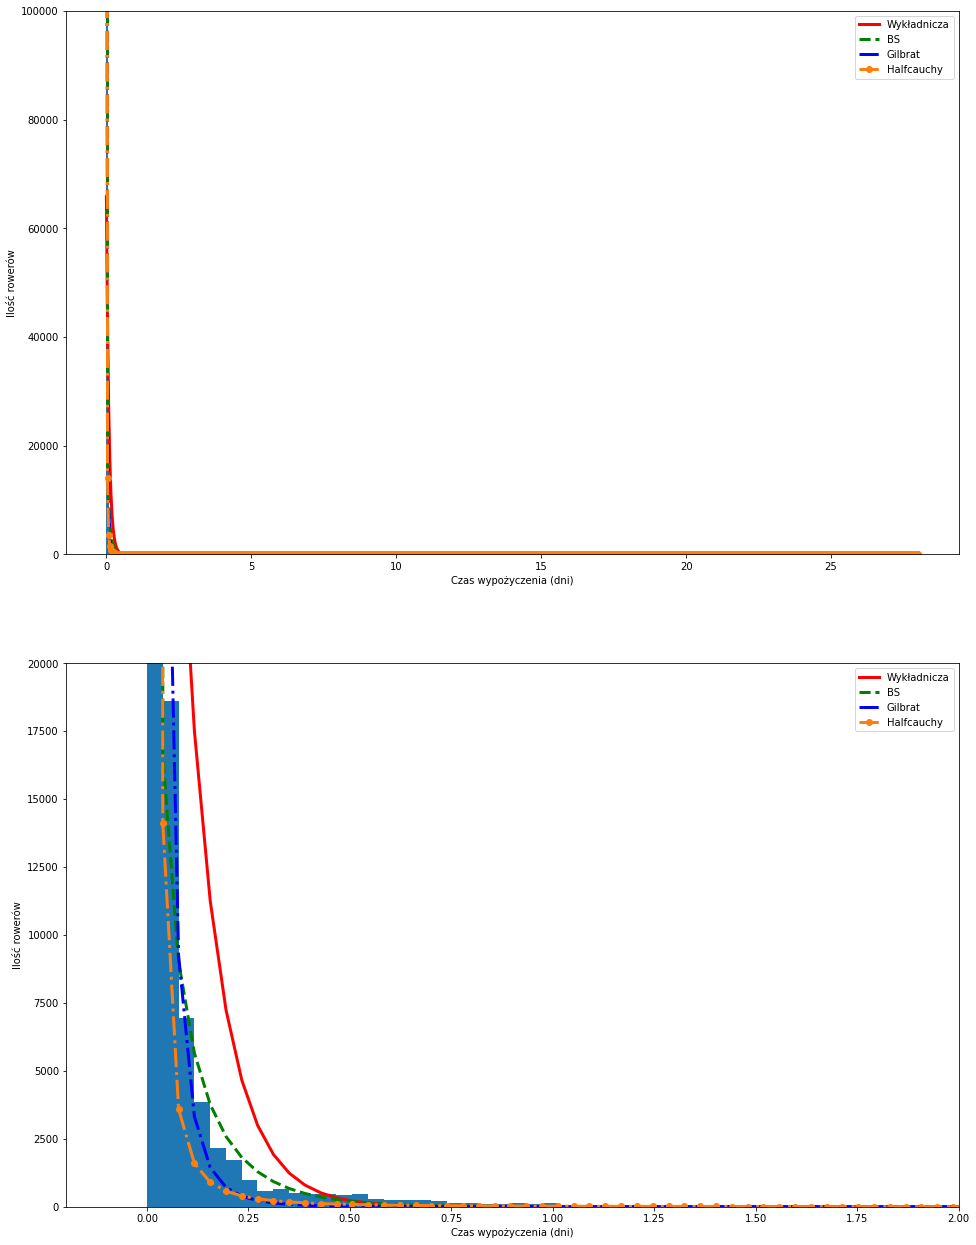

In [52]:
dist = ss.halfcauchy
args = dist.fit(flat_data)

dist_hc = dist.pdf(days, *args)

fig, ax = plt.subplots(2, 1, figsize=(16, 22))
# 1
ax[0].hist(flat_data, nbins)
ax[0].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[0].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[0].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[0].plot(days, dist_hc * len(flat_data) * smax / nbins,
        '-.o', lw=3, label='Halfcauchy')
ax[0].set_xlabel("Czas wypożyczenia (dni)")
ax[0].set_ylabel("Ilość rowerów")
ax[0].set_ylim([0,100000])
ax[0].legend()

#2
ax[1].hist(flat_data, nbins)
ax[1].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[1].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[1].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[1].plot(days, dist_hc * len(flat_data) * smax / nbins,
        '-.o', lw=3, label='Halfcauchy')
ax[1].set_xlabel("Czas wypożyczenia (dni)")
ax[1].set_ylabel("Ilość rowerów")
ax[1].legend()
ax[1].set_xlim([-0.2,2])
ax[1].set_ylim([0,20000])

## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu Half Cauchy-ego

In [53]:
hc_fit = ss.halfcauchy.fit(flat_data)
hc_fit

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(-2.3668294046462727e-12, 0.005926131246317634)

In [54]:
KS_test_HC = ss.kstest(flat_data, ss.halfcauchy.cdf, hc_fit)
KS_test_HC

KstestResult(statistic=0.4764140515189572, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,48, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Half Cauchy-ego.
#### Dla testu Kolmogorowa-Smiernowa 2-próbkowego:

In [55]:
KS_test_2_sample = ks_2samp(flat_data,dist_hc)
KS_test_2_sample

KstestResult(statistic=0.49632635842365924, pvalue=1.1118405037412486e-163)

W tym przypadku p-value również jest znacznie mniejsze niż 0.01 co potwierdza iż dane nie pochodzą z rozkłądu Half-Cauchy-ego

# Badanie czy dane przypominają rozkład Levy-ego

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


(0.0, 20000.0)

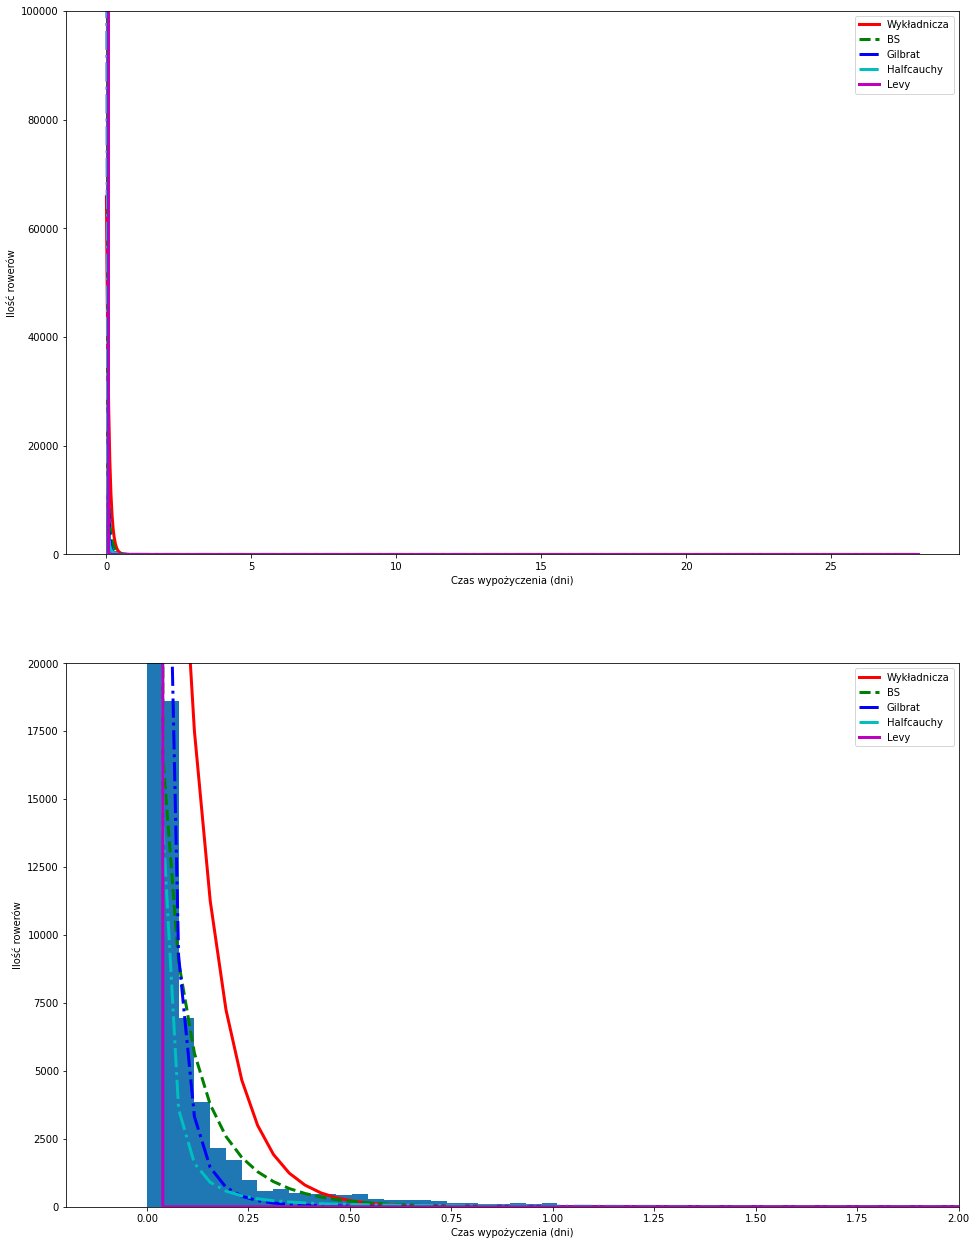

In [56]:
dist = ss.levy
args = dist.fit(flat_data)

dist_levy = dist.pdf(days, *args)

fig, ax = plt.subplots(2, 1, figsize=(16, 22))
# 1
ax[0].hist(flat_data, nbins)
ax[0].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[0].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[0].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[0].plot(days, dist_hc * len(flat_data) * smax / nbins,
        '-.c', lw=3, label='Halfcauchy')
ax[0].plot(days, dist_levy * len(flat_data) * smax / nbins,
        '-m', lw=3, label='Levy')
ax[0].set_xlabel("Czas wypożyczenia (dni)")
ax[0].set_ylabel("Ilość rowerów")
ax[0].set_ylim([0,100000])
ax[0].legend()

#2
ax[1].hist(flat_data, nbins)
ax[1].plot(days, dist_exp * len(flat_data) * smax / nbins,
        '-r', lw=3, label='Wykładnicza')
ax[1].plot(days, dist_bs * len(flat_data) * smax / nbins,
        '--g', lw=3, label='BS')
ax[1].plot(days, dist_gb * len(flat_data) * smax / nbins,
        '-.b', lw=3, label='Gilbrat')
ax[1].plot(days, dist_hc * len(flat_data) * smax / nbins,
        '-.c', lw=3, label='Halfcauchy')
ax[1].plot(days, dist_levy * len(flat_data) * smax / nbins,
        '-m', lw=3, label='Levy')
ax[1].set_xlabel("Czas wypożyczenia (dni)")
ax[1].set_ylabel("Ilość rowerów")
ax[1].legend()
ax[1].set_xlim([-0.2,2])
ax[1].set_ylim([0,20000])


## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu Levy-ego

In [57]:
levy_fit = ss.levy.fit(flat_data)
levy_fit

c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\maciej\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


(-7.461963604759727e-16, 2.5482661180176373e-15)

In [58]:
KS_test_levy = ss.kstest(flat_data, ss.levy.cdf, hc_fit)
KS_test_levy

KstestResult(statistic=0.4764140517732159, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,48, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Levy-ego.
#### Dla testu Kolmogorowa-Smirnowa 2-próbek :

In [59]:
KS_test_2_sample = ks_2samp(flat_data,dist_levy)
KS_test_2_sample

KstestResult(statistic=0.5221970593378953, pvalue=1.6505120138459628e-182)

Mała wartość p-value powoduje odrzucenie tezy iż dane mogą pochodzić z rozkładu Levy-ego

#### Wyznaczanie Dystrybuanty (CDF)

In [60]:
import statsmodels.distributions

In [61]:
ecdf = statsmodels.distributions.ECDF(flat_data)
ecdf

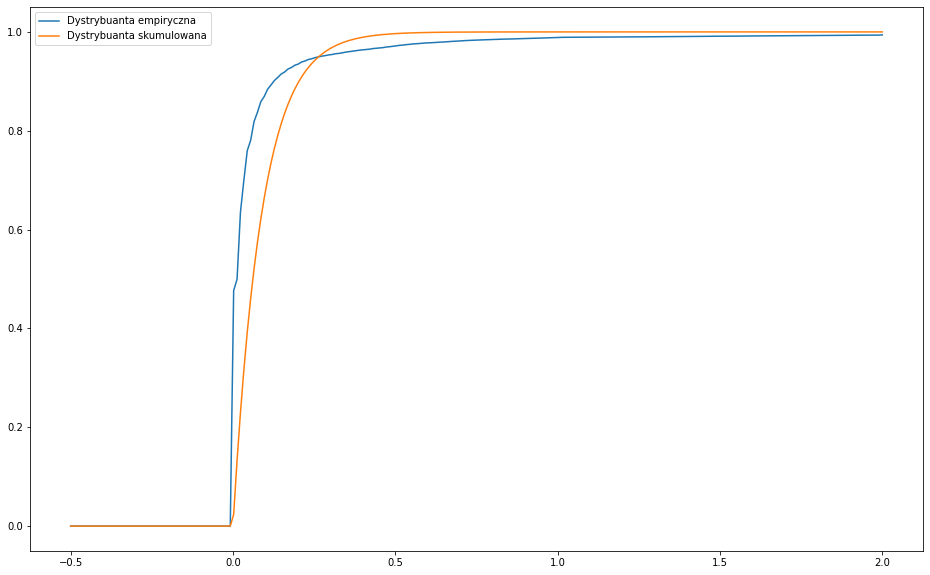

In [62]:
plt.figure(figsize=(16,10))
range_cdf = np.linspace(-0.5,2,240)
plt.plot(range_cdf, ecdf(range_cdf), label="Dystrybuanta empiryczna")
plt.plot(range_cdf, ss.expon(loc,scale).cdf(range_cdf), label="Dystrybuanta skumulowana")
plt.legend()

In [63]:
# Kwantyl rzędu 99%
value_range_99 = ss.expon.ppf(0.99,loc=loc, scale=scale)
value_range_99

0.4063686912258505

Wynik jest kwarcylem na poziomie 99%, co oznacza, że 99% danych znajduje się się w przedziale 0 ~ 0.41

## Wykresu czasu wypożyczenia roweru w zależności od dnia


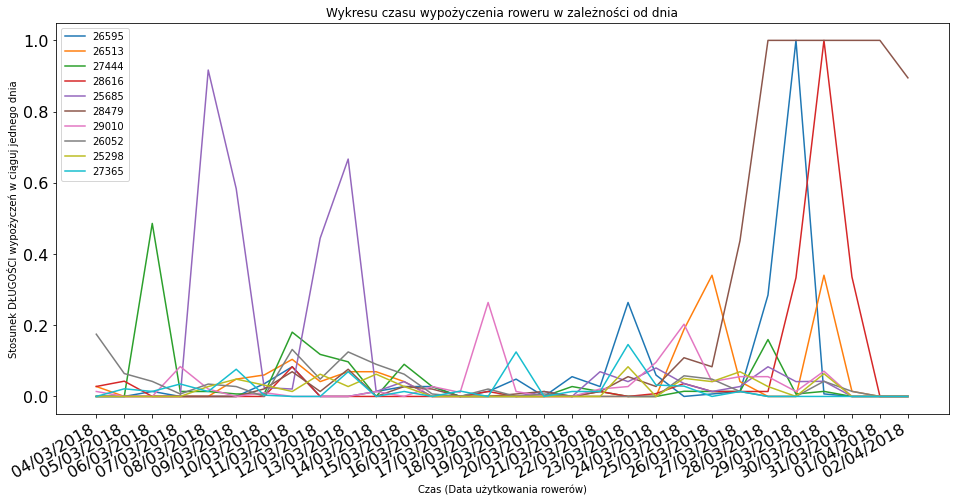

In [64]:
fig, ax = plt.subplots(figsize=(16,8))
list_of_bikes = list(df_transpose.sample(n=10,axis='columns'))
for bikes in list_of_bikes:
    ax.plot(df_transpose.index,df_transpose[bikes])
fig.autofmt_xdate()
ax.set_title("Wykresu czasu wypożyczenia roweru w zależności od dnia")
ax.set_xlabel("Czas (Data użytkowania rowerów)")
ax.set_ylabel("Stosunek DŁUGOŚCI wypożyczeń w ciąguj jednego dnia")
ax.tick_params(axis='both',which="major",labelsize=16)
ax.legend(list_of_bikes)
plt.show()

## Wykresu  czasu wypożyczenia roweru w zależności od dnia uwzględniający wypożyczenie dłuższe niż  dzień
Wygenerowany wykres nie ma sensu, ponieważ nie jest ciągły (ponieważ nie może być)


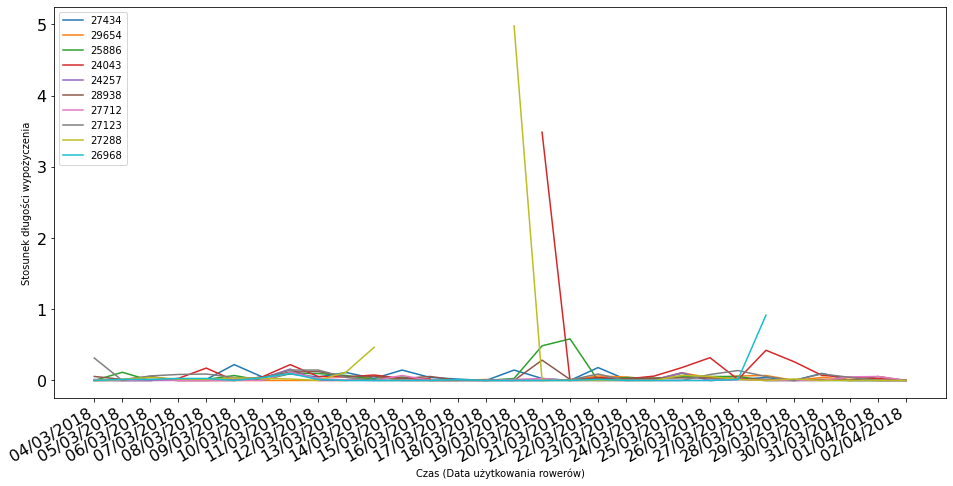

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
list_of_bikes = list(df_t.sample(n=10,axis='columns'))
for bikes in list_of_bikes:
    ax.plot(df_t.index,df_t[bikes])
fig.autofmt_xdate()
ax.set_xlabel("Czas (Data użytkowania rowerów)")
ax.set_ylabel("Stosunek długości wypożyczenia")
ax.tick_params(axis='both',which="major",labelsize=16)
ax.legend(list_of_bikes)
plt.show()

### Próba znalezienia wartości odstających (wykrywanie outlierów) za pomocą biblioteki stats


In [66]:
z = np.abs (ss.zscore (df_t)) 
treshold = 3
outliers = np.where(z>treshold)
print (outliers[0].shape)

(3689,)


Wykrywanie Outlierów skończyło się niepowodzeniem, ponieważ wykryto 3689 wartości odstajacych. Oczekiwana liczba wykrytych "anomalii" powinna być znacznie mniejsza.

# 
# 
# 
# Analiza danych w zależności od ilości wypożyczeń w ciągu dnia


#### Tworzenie dataframu który pokazuje ile razy rower został wypożyczony w ciągu jednego dnia

Funkcja count_borrow zlicza wyporzyczenia jednego dnia. Jeżeli rower wyporzyczono dnia wcześniejszego i oddano dzisaij to nie liczy tego jako wyporzyczenia natomiast jeżeli wzięto rower dzisiaj i dzisiaj do nie zwrócony to wypożyczenie naliczane jest na dzień dzisiejszy

In [67]:
def count_borrow (data):
    
    change_short = ((data != data.shift(-1,axis=1)) & 
                      ((data.shift(-1,axis=1) != 0) & (data != 0)) & 
                      (~data.shift(-1,axis=1).isnull())).sum(axis=1)
    # change_short zlicza jedynie krótkie wypożyczenia, takie w których nie zarejestrowano nieobecnoci rower, 
    # lecz jedynie zmiane stacji

    start_borrow = ((data != data.shift(-1,axis=1)) & 
                 (data.shift(-1,axis=1) == 0) &
                 (~data.shift(-1,axis=1).isnull())).sum(axis=1) 
    # start_borrow zlicza rozpoczęte dłużesz wypożyczenia(takie w których zaobserwowano brak roweru)
    number_of_borrow = change_short + start_borrow
    return number_of_borrow
    

In [68]:
df_borrow_num = pd.DataFrame()

In [69]:
for num in [0,1,2,3]:
    df_main = pd.read_csv(f'all_lokalization_of_bike0{num}.csv', low_memory=False)
    print(num)

    if num == 0:
        df_borrow_num['bike_numbers'] = df_main['bike_numbers']

    col_list = df_main.columns.tolist()
    date_days = sorted(list(set([name[:name.index(',')] for name in col_list[1:]])),
                       key=lambda x: time.mktime(time.strptime(x,"%d/%m/%Y"))) # lista dni posortowanych
    column_numbers = []

    for days in date_days:
        day_data = df_main.loc[:,df_main.columns.str.startswith(days)] #filtruje kolumny jedynie z danego dnia
        col_numb = len(day_data.columns)    # ilość odczytów z danego dnia
        column_numbers.append(col_numb)
        if df_borrow_num.columns[-1] == days:             
                        
            df_borrow_num[days] += count_borrow(day_data).astype('int32')
        else:
            df_borrow_num[days] = count_borrow(day_data)
    del df_main
    print("Koniec pętli: "+ str(num)+" z 3")
print('Koniec obliczeń')

0
Koniec pętli: 0 z 3
1
Koniec pętli: 1 z 3
2
Koniec pętli: 2 z 3
3
Koniec pętli: 3 z 3
Koniec obliczeń


In [70]:
df_borrow_num = df_borrow_num.astype('int32')
df_borrow_num

,bike_numbers,04/03/2018,05/03/2018,06/03/2018,07/03/2018,08/03/2018,09/03/2018,10/03/2018,11/03/2018,12/03/2018,...,24/03/2018,25/03/2018,26/03/2018,27/03/2018,28/03/2018,29/03/2018,30/03/2018,31/03/2018,01/04/2018,02/04/2018
0,24731,0,2,1,0,0,0,0,8,0,...,3,2,3,2,1,0,2,0,0,0
1,24673,0,0,0,0,2,0,0,1,8,...,0,4,3,1,0,0,1,0,0,0
2,24612,0,0,0,0,1,0,2,3,0,...,3,3,4,3,0,0,0,0,1,0
3,26774,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,26632,0,0,1,2,2,0,0,3,1,...,0,6,4,9,5,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,63613,0,0,0,0,0,3,0,1,1,...,0,5,5,1,1,0,2,1,0,0
5152,89519,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5153,28512,0,0,0,0,0,2,6,5,4,...,0,3,5,7,2,1,0,2,0,0
5154,63628,0,0,0,0,0,0,2,1,0,...,4,3,1,4,3,0,1,0,0,0


In [71]:
df_borrow_num.set_index("bike_numbers")
df_borrow_num_t = df_borrow_num.T
df_borrow_num_t.rename(columns=df_borrow_num_t.iloc[0].astype('int32'), inplace = True)
df_borrow_num_t.drop(df_borrow_num_t.index[0], inplace = True)
df_borrow_num_t

,24731,24673,24612,26774,26632,26402,26330,26217,25956,25927,...,96554,63626,28565,24155,80223,63613,89519,28512,63628,63615
04/03/2018,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
05/03/2018,2,0,0,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
06/03/2018,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
07/03/2018,0,0,0,0,2,4,1,3,1,0,...,1,0,0,0,0,0,0,0,0,0
08/03/2018,0,2,1,0,2,0,3,1,1,0,...,2,3,5,3,0,0,0,0,0,0
09/03/2018,0,0,0,0,0,5,0,0,0,0,...,1,3,3,0,1,3,1,2,0,0
10/03/2018,0,0,2,0,0,2,0,0,0,1,...,2,0,2,3,0,0,0,6,2,3
11/03/2018,8,1,3,0,3,4,0,4,2,6,...,5,0,1,5,3,1,0,5,1,2
12/03/2018,0,8,0,1,1,2,3,4,2,8,...,4,0,0,3,0,1,0,4,0,0
13/03/2018,4,6,5,3,0,4,1,2,2,4,...,2,0,3,3,0,5,0,2,1,3


In [72]:
list_of_bikes = list(df_borrow_num_t.sample(n=20,axis='columns'))


In [73]:
# wysokość osi y
m = ss.mode(df_borrow_num_t[list_of_bikes])
y_max = len(m[0].flatten())
y_max


20

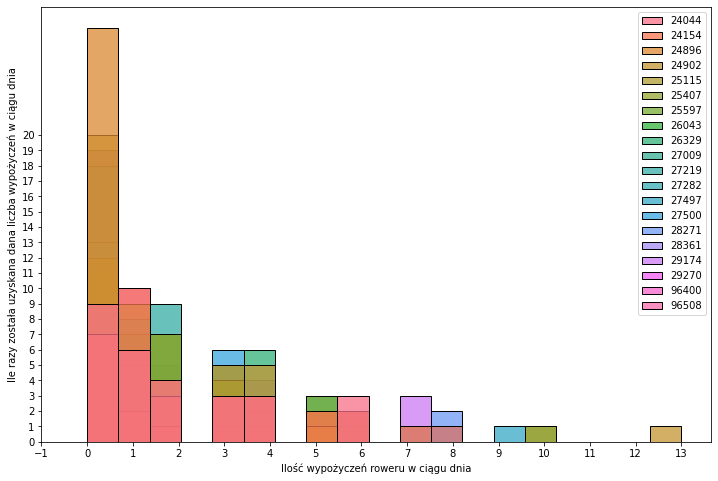

In [74]:
ax = plt.figure(figsize=(12,8)).gca()
hist = sns.histplot(data=df_borrow_num_t[list_of_bikes],legend=True)
ax.set_xlabel("Ilość wypożyczeń roweru w ciągu dnia")
ax.set_xticks(range(-1,df_borrow_num_t[list_of_bikes].max().max()+1))
ax.set_yticks(range(0,y_max+1))
ax.set_ylabel("Ile razy została uzyskana dana liczba wypożyczeń w ciągu dnia")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 
# Analiza rozkładów

In [75]:
flat_int_data = df_borrow_num_t.to_numpy().flatten()

#### Sprawdzenie, czy dane nie mają rozkładu wykładniczego (Eksponencjalnego)

In [76]:
P = ss.expon.fit(flat_int_data)
P

(0.0, 1.564125937419188)

In [77]:
loc, scale = P

In [78]:
rX = np.linspace(0,flat_int_data.max(), 100)
rP = ss.expon.pdf(rX, *P)

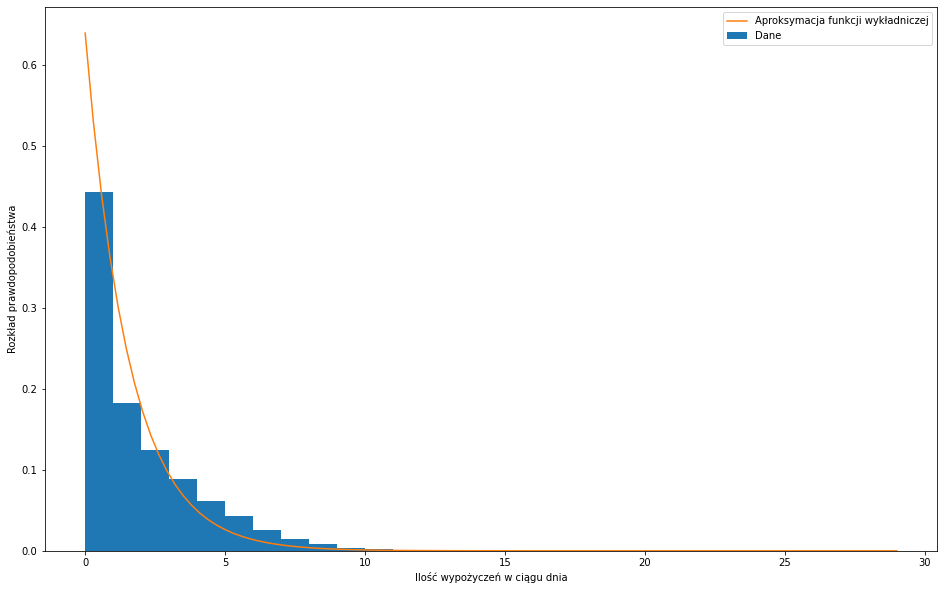

In [79]:
plt.figure(figsize=(16,10))
plt.hist(flat_int_data, bins=flat_int_data.max(), density=True, histtype="bar", label="Dane")
plt.plot(rX, rP, label="Aproksymacja funkcji wykładniczej")
plt.xlabel("Ilość wypożyczeń w ciągu dnia")
plt.ylabel("Rozkład prawdopodobieństwa")
plt.legend()

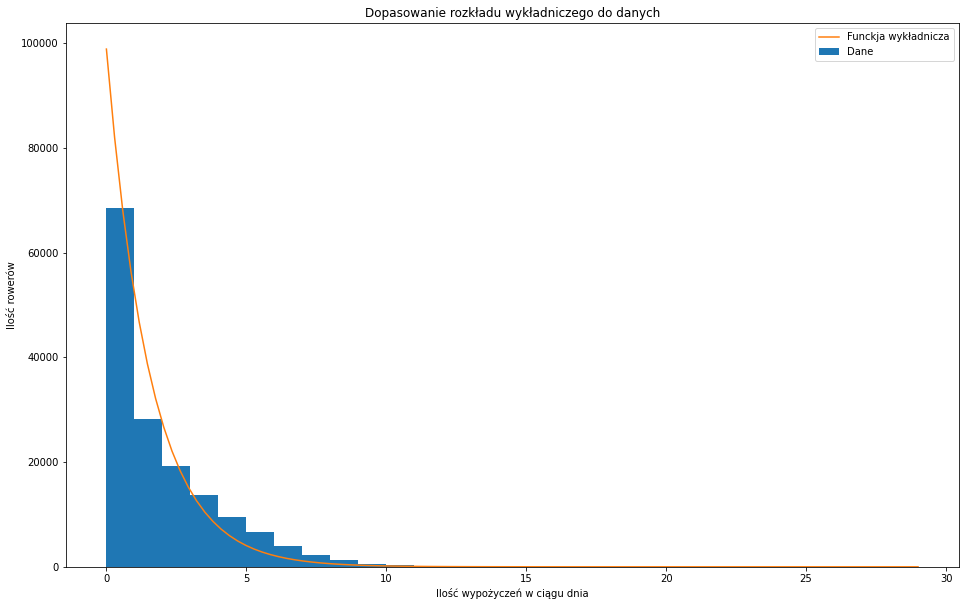

In [80]:
nbins = np.arange(0,flat_int_data.max()+1)
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(flat_int_data, nbins, label="Dane")
ax.plot(rX, rP * len(flat_int_data), label="Funckja wykładnicza")
ax.set_xlabel("Ilość wypożyczeń w ciągu dnia")
ax.set_ylabel("Ilość rowerów")
ax.set_title("Dopasowanie rozkładu wykładniczego do danych")
plt.legend()


## Przeprowadzenie testu Kolmogorowa-Smirnova

In [81]:
P = ss.expon.fit(flat_int_data)
P

(0.0, 1.564125937419188)

In [82]:
loc, scale = P

In [83]:
KS_test_expon = ss.kstest(flat_int_data, ss.expon.cdf, P)
KS_test_expon

KstestResult(statistic=0.4430954228083786, pvalue=0.0)

Na podstawie powyższych wyników można odrzucić tezę, iż dane pochodzą z rozkładu wykładniczego
Wartość p-value wyszła bliska 0 dlatego też z bardzo dużym prawdopodobieństwem można zaprzeczyć tezie 0.
#### Test kolmogorowa-Smirnowa dla 2 próbek zwraca wartości

In [84]:
KS_test_2_sample = ks_2samp(flat_data,dist_exp)
KS_test_2_sample

KstestResult(statistic=0.499104136201437, pvalue=1.2160384094053997e-165)

p-value jest znacznie mniejsze niż 0.01 dlatego też z dużym prawdopodobieństwem można zaprzeczyć rozkładowi wykładniczemu danych

# 
### Sprawdzanie z testu chi kwadrat 


In [85]:
ideal_compart = []
data_compart =[]
# wartość 5 rowerów jest uzyskiwana dla i=312
# ustawiona wartosc i=40 jest maksymalną wartoscia dla ktrorej mozna przeprowadzac test chi kwadrat,
# ponizej tej wartosci rozklad prawdopodobienstwa uzyskania wartosci wynosi 0 
# (powyzej tej wartosci w tescie chi-kwadrat pojawia sie dzielenie przez 0)
for i in range(40):
    dist = ss.expon(loc,scale)
    count_ideal = dist.cdf(i+1/12)-dist.cdf(i/12)
    ideal_compart.append(count_ideal*len(flat_int_data))
    
    count_data = len(list(filter(lambda x:x<=i+1/12 and x>=i/12, flat_int_data)))
    data_compart.append(count_data)

In [86]:
ideal_compart

[8025.3395422943995,
 69273.30499818227,
 98215.94644802049,
 110287.97645492874,
 113624.33472372455,
 112508.75568903843,
 109193.35779733135,
 104858.71449682018,
 100120.40732436515,
 95296.28442986414,
 90547.45799875571,
 85952.68186966774,
 81547.57862743361,
 77345.32067729582,
 73347.52650946008,
 69549.99490236859,
 65945.71618411948,
 62526.447496412766,
 59283.53107002331,
 56208.31374974863,
 53292.35675596925,
 50527.5353676982,
 47906.081093960114,
 45420.59404044311,
 43064.040062742744,
 40829.740378600894,
 38711.357662204806,
 36702.88071936926,
 34798.60882835456,
 32993.13629718048,
 31281.33750770775,
 29658.352569766335,
 28119.57363205151,
 26660.631857065397,
 25277.385047470834,
 23965.905901572714,
 22722.470871360096,
 21543.54959505198,
 20425.794876030035,
 19366.03318070271]

In [87]:
data_compart

[68538,
 28265,
 47469,
 61114,
 70669,
 77262,
 81286,
 83611,
 84918,
 85527,
 85861,
 86009,
 86072,
 57837,
 57852,
 57854,
 57861,
 57862,
 57866,
 57868,
 57870,
 57875,
 57875,
 57876,
 57876,
 38672,
 38672,
 38672,
 38672,
 38673,
 38673,
 38673,
 38673,
 38673,
 38673,
 38673,
 38673,
 25028,
 25028,
 25028]

In [88]:
ss.chisquare(data_compart, f_exp=ideal_compart)

Power_divergenceResult(statistic=640916.21990522, pvalue=0.0)

Wartość statystyczna p-value dla testu statystycznego Chi-Kwadrat wynosi 0 dlatego też należy odrzucić hipoteze, że wartości pochodzą z rozkładu wykładniczego


### 
## Badanie czy dane przypominają rozkład Fatiguelife

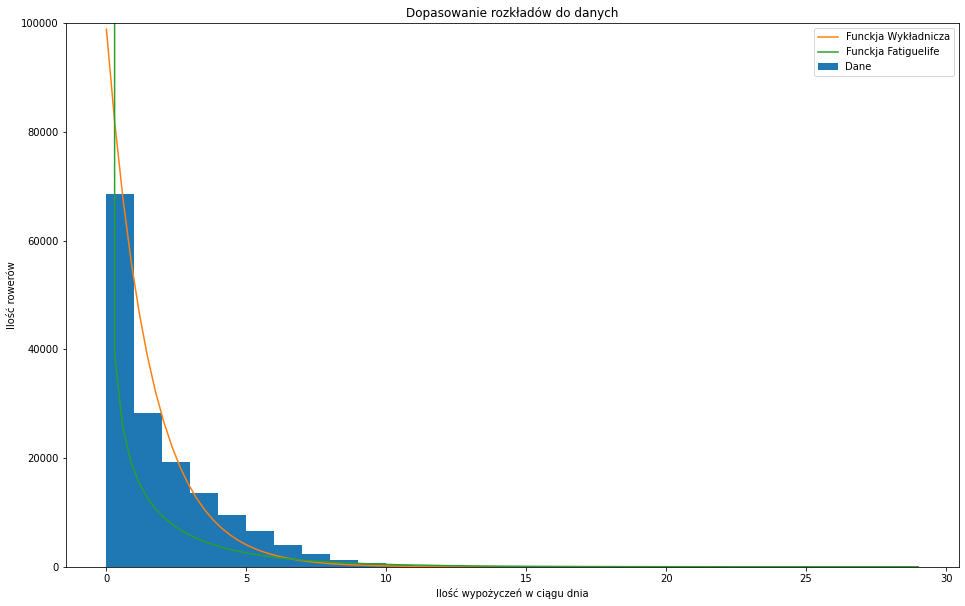

In [89]:
dist = ss.fatiguelife
args = dist.fit(flat_int_data)

dist_int_bs = dist.pdf(rX, *args)

fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(flat_int_data, nbins, label="Dane")
ax.plot(rX, rP * len(flat_int_data), label="Funckja Wykładnicza")
ax.plot(rX, dist_int_bs * len(flat_int_data), label="Funckja Fatiguelife")
ax.set_xlabel("Ilość wypożyczeń w ciągu dnia")
ax.set_ylabel("Ilość rowerów")
ax.set_title("Dopasowanie rozkładów do danych")
ax.set_ylim([0,100000])
plt.legend()


## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu FatigueLife

In [90]:
bs_int_fit = ss.fatiguelife.fit(flat_int_data)
bs_int_fit

(1973.8596095511086, -8.496717334519898e-14, 4.596293301276217e-07)

In [91]:
KS_test_int_BS = ss.kstest(flat_int_data, ss.fatiguelife.cdf, bs_int_fit )
KS_test_int_BS

KstestResult(statistic=0.32945538205371644, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,33, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Fatiguelife.
#### Dla testu Kolmogorowa-Smirnowa 2 próbkowego wychodzą wyniki


In [92]:
KS_test_2_sample = ks_2samp(flat_int_data,dist_int_bs)
KS_test_2_sample

KstestResult(statistic=0.5469045771916214, pvalue=1.3765609197520645e-28)

Mała wartość p-value również zapewnia odrzucenie hipotezę iż dane pochodzą z rozkładu FatigueLife

## Badanie czy dane przypominają rozkład HalfgeNormal

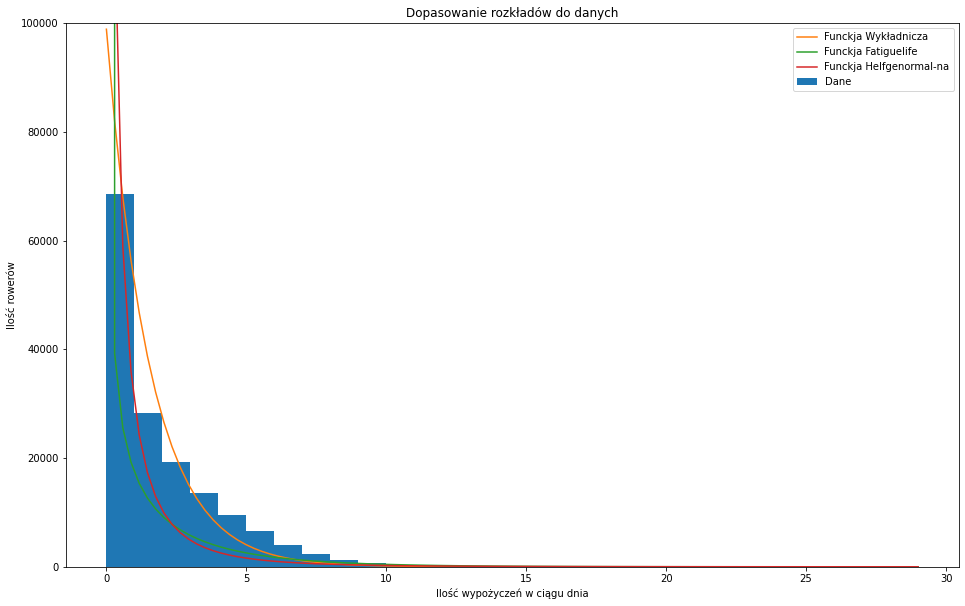

In [93]:
dist = ss.halfgennorm
args = dist.fit(flat_int_data)

dist_int_hgn = dist.pdf(rX, *args)

fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(flat_int_data, nbins, label="Dane")
ax.plot(rX, rP * len(flat_int_data), label="Funckja Wykładnicza")
ax.plot(rX, dist_int_bs * len(flat_int_data), label="Funckja Fatiguelife")
ax.plot(rX, dist_int_hgn * len(flat_int_data), label="Funckja Helfgenormal-na")
ax.set_xlabel("Ilość wypożyczeń w ciągu dnia")
ax.set_ylabel("Ilość rowerów")
ax.set_title("Dopasowanie rozkładów do danych")
ax.set_ylim([0,100000])
plt.legend()


## Przeprowadzenie testu Kolmogorowa-Smirnova dla rozkładu Halfgenormal


In [94]:
hgn_int_fit = ss.halfgennorm.fit(flat_int_data)
hgn_int_fit

(0.3476767937842598, -1.5860092306608333e-26, 0.01959021329761297)

In [95]:
KS_test_int_hgn = ss.kstest(flat_int_data, ss.halfgennorm.cdf, hgn_int_fit )
KS_test_int_hgn

KstestResult(statistic=0.4430954228083786, pvalue=0.0)

Na podstawie danych wyjściowych widać, że statystyka testowa wynosi  0,56, a odpowiadająca jej wartość p jest bliska 0.
Ponieważ wartość p jest mniejsza niż 0,01, odrzucamy hipotezę zerową. 
Mamy wystarczające dowody, aby stwierdzić, że dane próbki nie pochodzą z rozkładu Fatiguelife.
#### Dla testu Kolmogorowa-Smirnowa 2 próbkowego wychodzą wyniki


In [96]:
KS_test_2_sample = ks_2samp(flat_int_data,dist_int_hgn)
KS_test_2_sample

KstestResult(statistic=0.5469045771916214, pvalue=1.3765609197520645e-28)

Wartość p-value jest znacznie mniejsza niż 0.01 dlatego też z dużą dozą prawdopodobieństwa stwierdzamy iż dane nie należą do rozkładu Halfgenormal-nego.

# 
## Generowanie wykresu ilości wypożyczeń w zależności od czasu


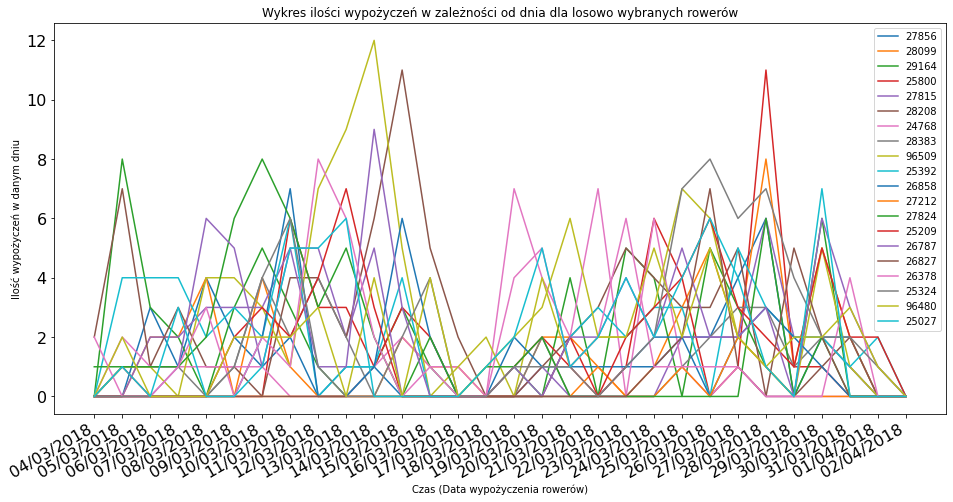

In [97]:
fig, ax = plt.subplots(figsize=(16,8))
list_of_bikes = list(df_borrow_num_t.sample(n=20,axis='columns'))
for bikes in list_of_bikes:
    ax.plot(df_borrow_num_t.index,df_borrow_num_t[bikes])
fig.autofmt_xdate()
ax.set_xlabel("Czas (Data wypożyczenia rowerów)")
ax.set_ylabel("Ilość wypożyczeń w danym dniu")
ax.set_title('Wykres ilości wypożyczeń w zależności od dnia dla losowo wybranych rowerów')
ax.tick_params(axis='both',which="major",labelsize=16)
ax.legend(list_of_bikes)
plt.show()

# 
## Zliczanie ile było dni, w których rower nie był wypożyczany

In [98]:
counter = df_borrow_num_t[df_borrow_num_t==0]
column_counter = counter.count()
column_counter

24731    15
24673    18
24612    16
26774    25
26632    13
         ..
63613    14
89519    29
28512    14
63628    15
63615    14
Length: 5156, dtype: int64

In [99]:
z1 = np.abs (ss.zscore (column_counter)) 
treshold = 3
outliers = np.where(z1>treshold)
print (outliers[0].shape)

(48,)


In [100]:
outliers

(array([ 101, 1156, 1346, 1411, 1416, 1674, 1767, 2171, 2429, 2782, 2792,
        3013, 3103, 3163, 3169, 3179, 3285, 3403, 3449, 3706, 4081, 4324,
        4327, 4329, 4330, 4338, 4570, 4695, 4710, 4712, 4815, 4852, 4879,
        4948, 4949, 4960, 4969, 5028, 5063, 5065, 5067, 5134, 5140, 5141,
        5143, 5144, 5150, 5152], dtype=int64),)

### Numery rowerów i ilość dni w których były nieużytkowane

In [101]:
column_counter.iloc[outliers]

26575    27
96537    28
26249    27
25949    29
25367    30
27369    27
24912    28
27553    27
25509    27
26050    30
25521    28
27972    29
25266    27
28657    27
28277    27
24896    27
28583    29
29235    28
25549    29
24473    27
26937    29
24264    27
24299    27
24292    27
24282    27
24398    27
27885    28
24840    27
96560    29
96532    29
96180    29
26892    28
28500    27
24922    27
24919    29
26849    28
24819    27
96098    28
24869    28
27917    27
26670    28
24146    29
61308    28
61306    28
61304    29
63616    29
80223    28
89519    29
dtype: int64

<AxesSubplot:>

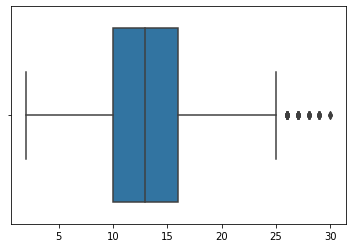

In [102]:
sns.boxplot(x=column_counter)

In [103]:
df_transpose.iloc[:,outliers[0]]

,26575,96537,26249,25949,25367,27369,24912,27553,25509,26050,...,24869,27917,26670,24146,61308,61306,61304,63616,80223,89519
04/03/2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.020979,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
05/03/2018,0.000000,0.042857,0.000000,0.000000,0.000000,0.064286,0.000000,0.000000,0.000000,0.671429,...,0.350000,0.350000,0.350000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
06/03/2018,0.000000,0.542254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239437,1.000000,...,0.000000,0.000000,0.000000,0.929577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
07/03/2018,0.000000,1.000000,0.888112,0.000000,0.000000,0.000000,0.000000,0.000000,0.538462,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.972028,0.923077,0.986014,0.853147,1.000000,1.000000
08/03/2018,0.000000,1.000000,1.000000,0.000000,0.000000,0.013889,0.000000,0.027778,0.430556,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.680556,1.000000,1.000000,1.000000,1.000000
09/03/2018,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020833,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.243056,0.798611
10/03/2018,0.000000,1.000000,1.000000,0.695035,0.695035,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.758865
11/03/2018,0.069444,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
12/03/2018,0.000000,1.000000,1.000000,0.673611,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.555556,1.000000
13/03/2018,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Na poniższych wykresach przedstawiono przebieg wypożyczenia rowerów w zależności od czasu
##### 1 - oznacza nieobecność roweru na żadnej stacji cały dzień (brak odczytu roweru na stacji)
##### 0 - oznacza, że rower był nieużywany i stał na stacji cały dzień

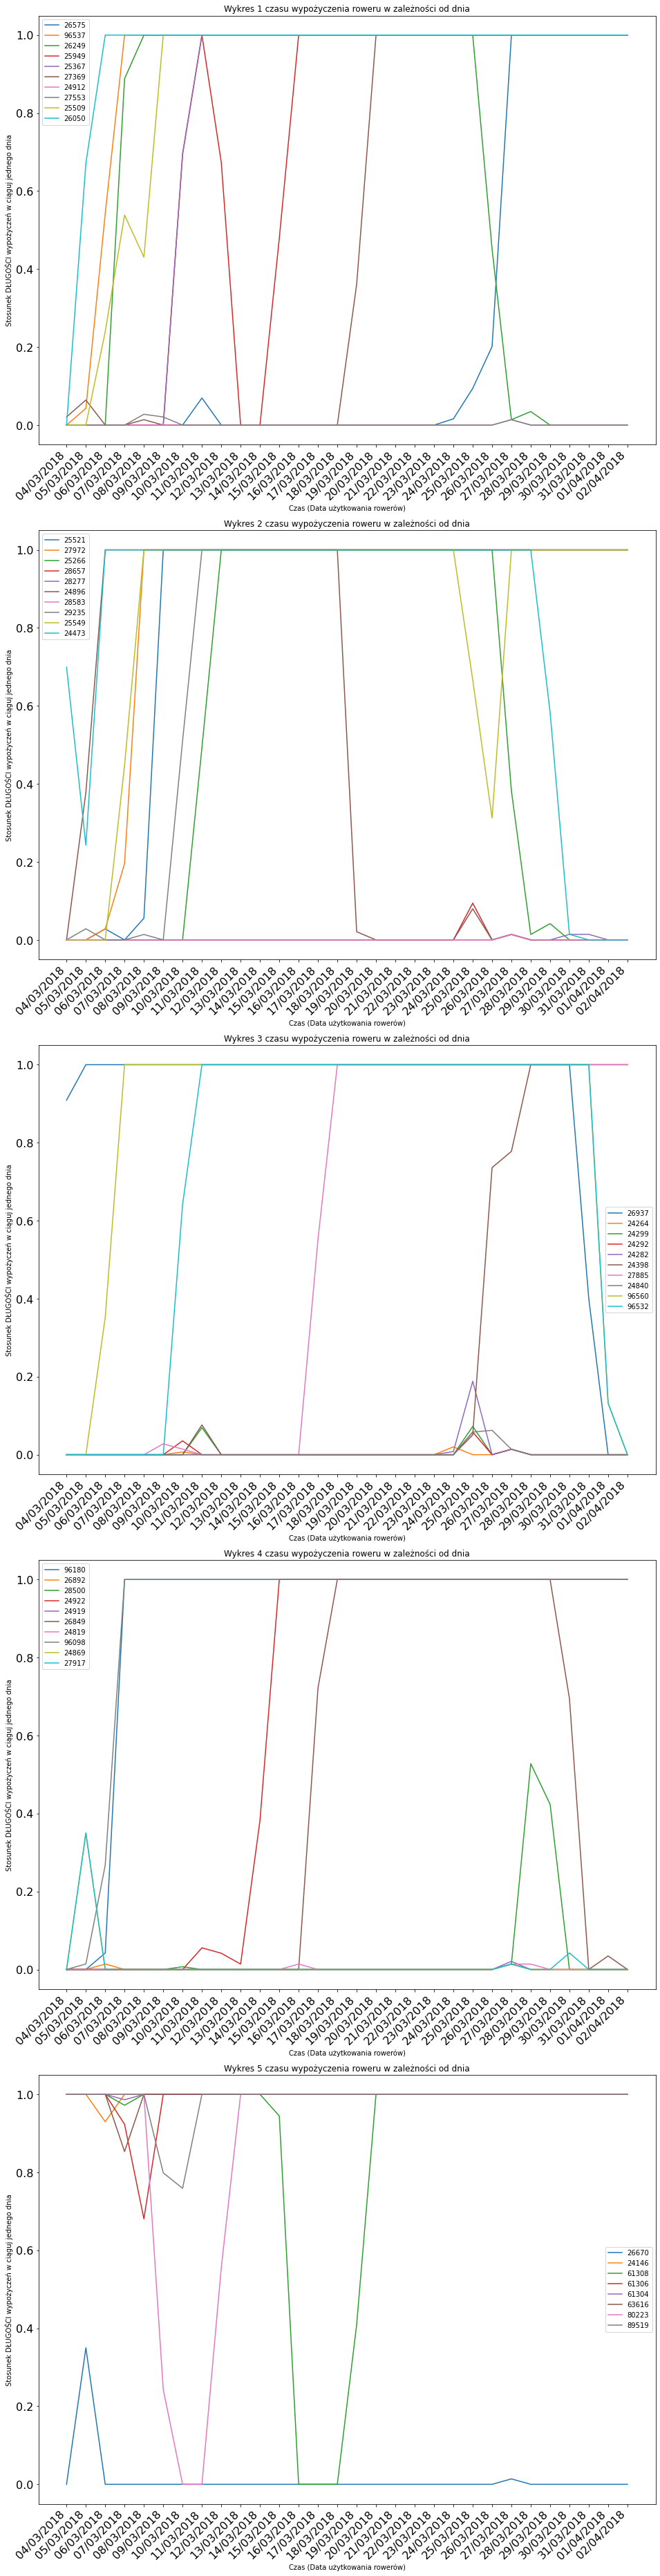

In [104]:
#list_of_outliers = list(df_transpose.iloc[:,outliers[0]])

fig, ax = plt.subplots(5,figsize=(16,50))
fig.subplots_adjust(bottom = 0.5, top= 1.2)
plt.xticks(rotation=45)

for i in range(5):
    list_of_outliers = list(df_transpose.iloc[:,outliers[0]])[i*10:(i+1)*10]
    for bikes in list_of_outliers:
        ax[i].plot(df_transpose.index,df_transpose[bikes])
    
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right")
    fig.subplots_adjust(bottom=0.2)
    ax[i].set_title(f"Wykres {i+1} czasu wypożyczenia roweru w zależności od dnia")
    ax[i].set_xlabel("Czas (Data użytkowania rowerów)")
    ax[i].set_ylabel("Stosunek DŁUGOŚCI wypożyczeń w ciąguj jednego dnia")
    ax[i].tick_params(axis='both',which="major",labelsize=16)
    ax[i].legend(list_of_outliers)
plt.show()

##### Powyższe rowery ( w ilości 48) znacznie odbiegają od normy w porównaniu z innymi, dlatego też są podejrzane o to, iż były zepsute lub bardzo bardzo mało używane. Dwa rowery  numerach 26050 oraz 25367  (30 dni) nie zostały wypożyczone ani razu, jedyna akcja związana z tymi rowerami to było oddanie ich na stację.
# 
Na tym etapie można stwierdzić które rowery prawdopodobnie były zepsute i można przypuszczać kiedy uszkodzenie miało miejsce. Analizując wykresy Zepsutym rowerem może wydawać się rowery 26670, 27917, 28583, 28657, 24264, 27553 i o podobnych charakterystykach, to znaczy, są to rowery, które były bardzo rzadko wypożyczane i od pewnego momentu na bardzo krótki okres. Sytuacja przypomina wypożyczenia, które wyglądają, jakby ktoś po wypożyczeniu roweru zorientował się, że ten model jest zepsuty i oddał go na stację. Wiele z tych rowerów mogło być serwisowane o czym świadczą długie okresy nieobecności na żadnej stacji.
# ========= KONIEC PROJEKTU ===========

# Próba sprawdzenia wyglądu danych ze słupka 0 histogramu 
##### Niestety z poniższych danych nie udało się pozyskać żadnych obiecujących rezultatów

In [105]:
P = ss.norm.fit(column_counter)
P

(13.292862684251357, 4.485684871223316)

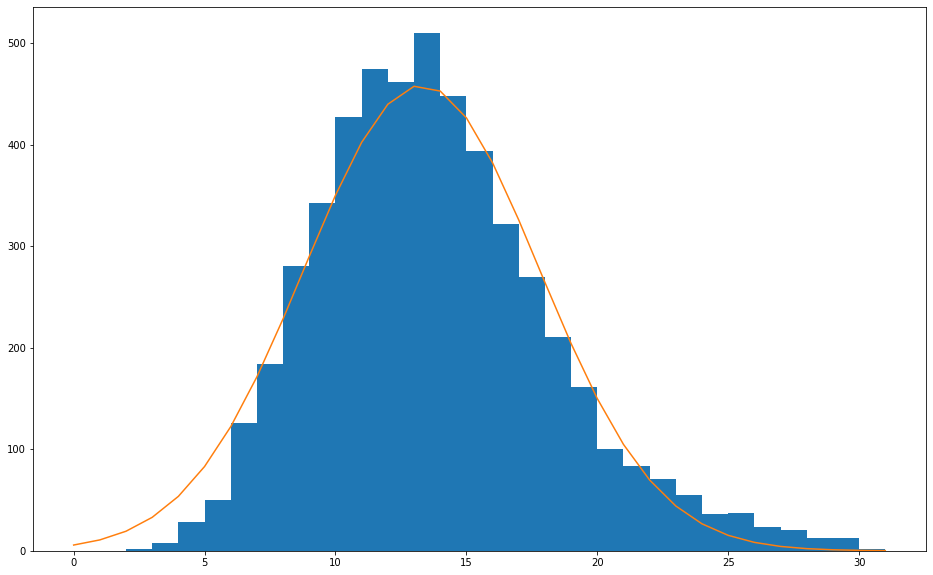

In [106]:
fig, ax = plt.subplots(figsize=(16, 10))

dist_normal = ss.norm.pdf(np.arange(32),*P)

ax.hist(column_counter,range(32), label="Dane")
ax.plot(np.arange(32), dist_normal*len(column_counter), label="Rozkład normalny")

#### Przeprowadzenie testu Kologorowa-Smirnova

In [107]:
P = ss.norm.fit(column_counter)

In [108]:
KS_test_normal = ss.kstest(column_counter,ss.norm.cdf, P)
KS_test_normal

KstestResult(statistic=0.08770348384194904, pvalue=5.890990390227624e-35)

Krzywa prawdopodobieństwa

In [109]:
import pylab

((array([-3.64359912, -3.40875881, -3.27935093, ...,  3.27935093,
          3.40875881,  3.64359912]),
  array([ 2,  2,  3, ..., 29, 30, 30], dtype=int64)),
 (4.426845902425712, 13.292862684251357, 0.9862424045492534))

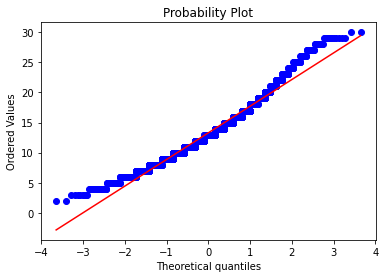

In [110]:
ss.probplot(column_counter, dist='norm', plot=pylab)

Poniżej wykres pudełkowy (Boxa Whiskera) pokazuje które wartości są odstające od normalności wykresu, co pokrywa się z wynikami Outlierów

<AxesSubplot:>

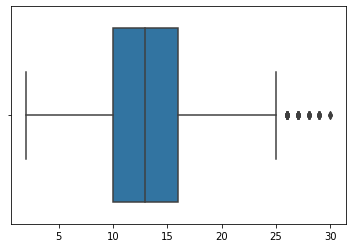

In [111]:
sns.boxplot(x=column_counter)

#### Przeprowadzenie testu chi-kwadrat


In [112]:
statistic, p_value = ss.chisquare(column_counter)
print(f"Test chi-kwadrat wyzanczył statystykę: {statistic}, natomiast P-value wynosi: {p_value}")

Test chi-kwadrat wyzanczył statystykę: 7804.622661881, natomiast P-value wynosi: 1.2381789560662936e-113


#### Przeprowadzenie testu Lilliefors
Jest to bardziej konserwatywny test niż test chi-kwadrat, czy test Kolmogorowa-Smirnowa, co oznacza, że w tym teście istnieje największe prawdoodobieństwo na wykrycie rozkładu normalnego z danych odstająych od tego rozkładu

In [113]:
from statsmodels.stats.diagnostic import lilliefors
statistic, p_value = lilliefors(column_counter)
print(f"Test Lilliefors wyzanczył statystykę: {statistic}, natomiast P-value wynosi: {p_value}")

Test Lilliefors wyzanczył statystykę: 0.08770096327646043, natomiast P-value wynosi: 0.0009999999999998899


Niestety p-value wynosi jedynie 0.000999... co ostatecznie zaprzecza narmalności tego rozkładu

# 
## Po usunięciu outlierów


In [114]:
col_count_norm =column_counter.drop(column_counter.iloc[outliers].index)
col_count_norm

24731    15
24673    18
24612    16
26774    25
26632    13
         ..
24155    17
63613    14
28512    14
63628    15
63615    14
Length: 5108, dtype: int64

#### Przeprowadzenie testu chi-kwadrat


In [115]:
statistic, p_value = ss.chisquare(col_count_norm)
print(f"Test chi-kwadrat wyzanczył statystykę: {statistic}, natomiast P-value wynosi: {p_value}")

Test chi-kwadrat wyzanczył statystykę: 7093.283137640074, natomiast P-value wynosi: 2.1234965343935873e-69


#### Przeprowadzenie testu Lilliefors
Jest to bardziej konserwatywny test niż test chi-kwadrat, czy test Kolmogorowa-Smirnowa, co oznacza, że w tym teście istnieje największe prawdoodobieństwo na wykrycie rozkładu normalnego z danych odstająych od tego rozkładu

In [116]:
from statsmodels.stats.diagnostic import lilliefors
statistic, p_value = lilliefors(col_count_norm)
print(f"Test Lilliefors wyzanczył statystykę: {statistic}, natomiast P-value wynosi: {p_value}")

Test Lilliefors wyzanczył statystykę: 0.08143973787764008, natomiast P-value wynosi: 0.0009999999999998899


((array([-3.64119234, -3.40620644, -3.27671097, ...,  3.27671097,
          3.40620644,  3.64119234]),
  array([ 2,  2,  3, ..., 26, 26, 26], dtype=int64)),
 (4.2366349283184235, 13.155246671887236, 0.9905787212059864))

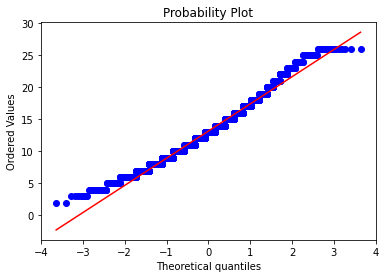

In [117]:
ss.probplot(col_count_norm, dist='norm', plot=pylab)

In [118]:
P = ss.norm.fit(col_count_norm)
P

(13.155246671887236, 4.274129745352654)

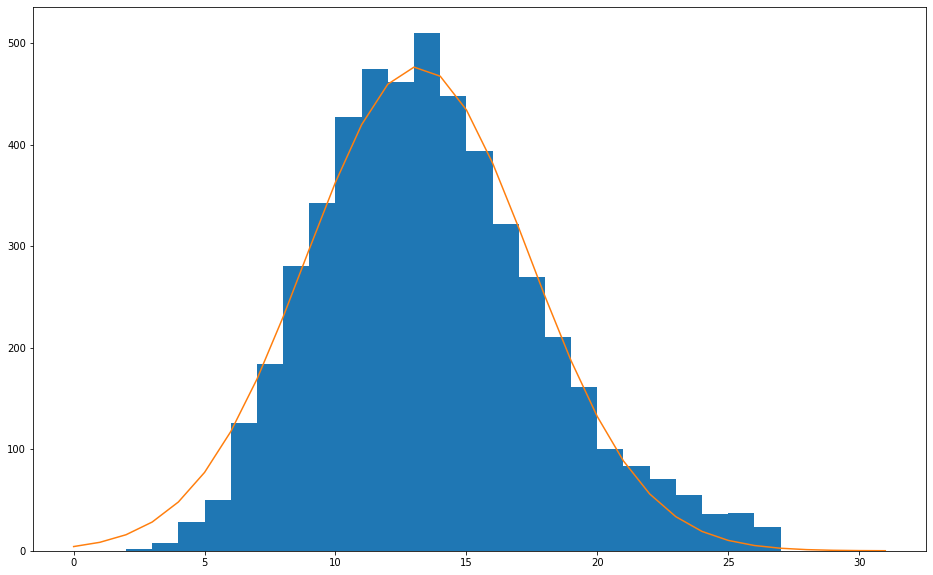

In [119]:
fig, ax = plt.subplots(figsize=(16, 10))

dist_normal = ss.norm.pdf(np.arange(32),*P)

ax.hist(col_count_norm,range(32), label="Dane")
ax.plot(np.arange(32), dist_normal*len(col_count_norm), label="Rozkład normalny")


## Próba użycia metody Isolation Forest
metoda ta polega na stworzeniu modelu, który automatycznie wyszukuje outliery

In [120]:
from sklearn.ensemble import IsolationForest

In [121]:
x = column_counter
isolation_forest = IsolationForest(n_estimators=1000)
isolation_forest.fit(x.values.reshape(-1, 1))

IsolationForest(n_estimators=1000)

In [122]:
xx = np.linspace(0, 31, 1000).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

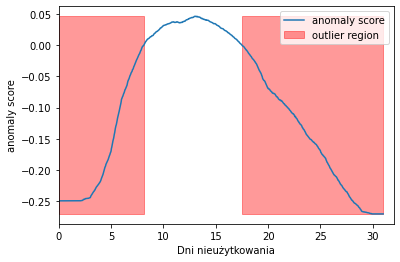

In [123]:
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Dni nieużytkowania')
plt.xlim([0, 32])
plt.show()

Niestety metoda którą tutaj zastosowano nie daje oczekiwanych rezulatatów dlatego też nie zajmowano się nią dłużej 

# Pierwszy zarys projektu
### Tutaj starano się zrobić sztuczną klasyfikacje


In [124]:
df_ratio1=df_ratio.copy()

In [125]:
destroy = 0.0139 # suma czasu gdy rower jest wypożyczony przez 2 odczyty w ciągu całego tygodnia
suspect = 0.03

df_ratio1['Srednia'] = df_ratio.iloc[:, 1:].mean(axis=1)
df_ratio1.to_csv(filename_write, encoding='utf-8', index=False)
print(df_ratio1['Srednia'].mean())

0.08517551032742998


In [126]:
df_ratio1['Suma 7 dni'] = df_ratio1.iloc[:,-8:-1].sum(axis=1)

#### Stworzenie warunku (kiedy rower jest zepsuty a kiedy nie) [ wyp. 2 razy czyli około 20 min w ciągu całego tygodnia]

In [127]:
df_ratio1.loc[df_ratio1['Suma 7 dni'] > destroy ,'Klasyfikacja'] = 1

# równowartość wypożyczenia roweru przez godzinę w ciągu całego tygodnia PODEJRZANY
#df_ratio.loc[df_ratio['Suma 7 dni'] <= suspect, 'Klasyfikacja'] = 1

# równowartość wypożyczenia roweru przez max 30 min w ciągu tygodnia ZEPSUTY
df_ratio1.loc[df_ratio1['Suma 7 dni'] <= destroy, 'Klasyfikacja'] = 0

In [128]:
df_ratio1['Klasyfikacja'].value_counts(sort=False)

0.0     303
1.0    4853
Name: Klasyfikacja, dtype: int64

In [129]:
x_plot = df_ratio1['Klasyfikacja'].value_counts(sort=False).keys()
y_plot = df_ratio1['Klasyfikacja'].value_counts(sort=False).tolist()
#bars = ['Zepsuty','Podejrzany','Sprawny']
bars = ['Zepsuty','Sprawny']

#### Stosunek rowerów zepsutych do sprawnych

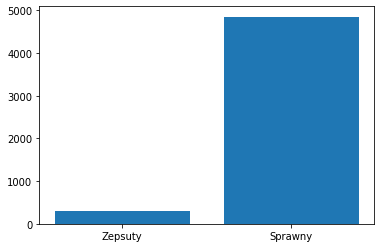

In [130]:
plt.bar(x_plot, y_plot)

plt.xticks(x_plot, bars)
plt.show()

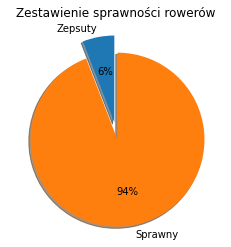

In [131]:
fig, ax = plt.subplots()
# ax.pie(y_plot,explode=(0.1,0.1,0.1) ,labels=bars,startangle=90,shadow=True, autopct='%1.f%%')
ax.pie(y_plot,explode=(0.1,0.1) ,labels=bars,startangle=90,shadow=True, autopct='%1.f%%')
plt.title("Zestawienie sprawności rowerów")
plt.show()

In [132]:
X = df_ratio1.iloc[:2000,2:-4]
y = df_ratio1.iloc[:2000,-1]

In [133]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,shuffle=True, test_size=0.2)

In [134]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [135]:
clf.score(X_train,y_train)

0.945625

In [136]:
clf.coef_

array([[ 0.11430189, -0.23525962, -0.14139719, -0.36748825,  0.51467292,
         0.03194206,  0.90273323,  0.35370776, -0.18938315, -0.26972918,
         0.41788156, -0.48413001,  0.24325863,  0.47882537, -0.68814585,
        -0.05350617, -0.13419595,  0.85974554,  0.63377695,  0.16596839,
         1.06580995,  1.3526903 ,  2.59883814,  2.57563028,  1.45525555,
         3.10342624,  1.66817664,  1.17444731]])

#### Wykres wag współczynników


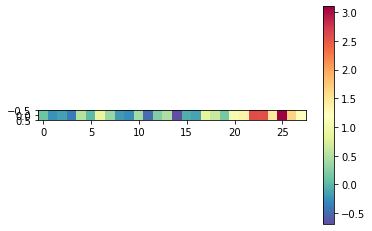

In [137]:
plt.imshow(clf.coef_, cmap='Spectral_r')
plt.colorbar()
plt.show()

In [138]:
y_pred = clf.predict(X_test)

###### Dokładność

In [139]:
clf.score(X_test, y_test)

0.9525

In [140]:
confusion_m = confusion_matrix(y_pred, y_test)
confusion_m

array([[  0,   0],
       [ 19, 381]], dtype=int64)

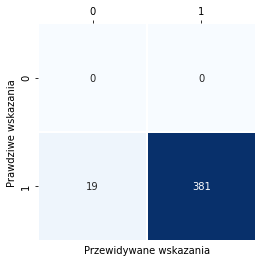

In [141]:
import seaborn as sns

ax = sns.heatmap(confusion_m, annot=True, linewidths=1, cbar=False, square=True, cmap='Blues', fmt='g')
ax.xaxis.tick_top()
ax.set_ylabel("Prawdziwe wskazania")
ax.set_xlabel("Przewidywane wskazania")
plt.show()

In [142]:
import scikitplot as skplt


In [143]:
y_pred.reshape(len(y_pred),1)
y_pred.shape

(400,)

In [144]:
y_train.shape

(1600,)

In [145]:
y_score = clf.decision_function(X_test)
y_score.shape

(400,)

In [146]:
from sklearn import metrics

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)

In [148]:
metrics.auc(fpr, tpr)

0.9484735460698991

In [149]:
roc_auc = metrics.auc(fpr, tpr)

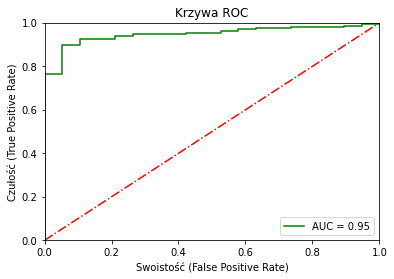

In [150]:
plt.title('Krzywa ROC')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Czułość (True Positive Rate)')
plt.xlabel('Swoistość (False Positive Rate)')
plt.show()